## Importación Data

In [67]:
import pandas as pd
import numpy as np

data = pd.read_csv("synthetic_edu_insight360.csv",
                   low_memory=False ,
                    encoding='utf-8',      # o 'latin-1' si hay caracteres especiales
                    sep=',',               # separador (por defecto es coma)
                    header=0,              # fila que contiene los nombres de columnas
                    index_col=None)        # si quieres usar una columna como índice

In [68]:
# Resumen general
data.info()
print('data.columns:',data.columns)
print('data.shape:',data.shape)
data.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   study_hours_wk                 1000 non-null   float64
 1   sleep_hours                    1000 non-null   float64
 2   lms_activity_rate              1000 non-null   float64
 3   attendance_rate                1000 non-null   float64
 4   assignments_on_time_rate       1000 non-null   float64
 5   procrastination_index          1000 non-null   float64
 6   self_efficacy                  1000 non-null   float64
 7   stress                         1000 non-null   float64
 8   internet_quality               1000 non-null   float64
 9   part_time_job_hours            1000 non-null   float64
 10  commute_min                    1000 non-null   float64
 11  social_support                 1000 non-null   float64
 12  screen_time_nonstudy_hr        1000 non-null   fl

,study_hours_wk,sleep_hours,lms_activity_rate,attendance_rate,assignments_on_time_rate,procrastination_index,self_efficacy,stress,internet_quality,part_time_job_hours,...,grade_Estadística_prior_20,grade_Estadística_current_20,grade_Ética_prior_20,grade_Ética_current_20,student_id,cluster_label_true,major,primary_device,internet_type,cohort
0,13.675912,7.844978,66.964681,81.874974,68.209130,47.941762,60.678050,43.664949,72.620031,7.339488,...,15.303218,10.537708,15.401349,12.490938,620.436883,A,Psicología,Laptop,Fibra,2023
1,13.466737,8.179369,72.621295,84.235342,70.308999,47.908609,56.925206,42.669400,67.852973,6.860263,...,14.786166,11.526852,15.418243,11.440954,780.919440,A,Psicología,Laptop,Fibra,2025
2,14.464209,8.176980,70.569146,81.577863,72.519438,47.931619,56.084815,40.597457,72.283311,7.390099,...,15.310248,10.572145,15.861150,12.246119,709.528028,A,Industrial,Smartphone,Fibra,2025
3,12.957480,8.436137,77.400928,87.668652,73.797887,46.902252,56.388493,43.096292,68.025160,7.110476,...,15.798037,10.362166,16.575629,12.663074,827.095583,A,Sistemas,Laptop,Fibra,2024
4,12.752495,8.148688,74.805515,81.846365,73.153495,45.946799,57.239238,41.892244,69.230942,6.305688,...,15.916237,11.453137,14.954452,12.286619,649.522843,A,Sistemas,Smartphone,Cable,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.981113,8.178626,70.474349,84.074582,74.965438,49.617846,56.122101,43.039980,74.954125,6.537784,...,14.297841,10.938735,16.549958,11.440954,827.095583,A,Industrial,Laptop,Fibra,2023
96,16.027039,8.138058,59.790802,80.369037,69.355406,49.151411,56.407999,41.584623,78.758770,6.304894,...,14.849100,10.619937,16.091420,12.632223,577.207038,A,Administración,Desktop,Fibra,2022
97,14.282894,8.165541,78.995949,78.880489,77.423741,46.676387,56.906972,39.345230,70.687062,6.929951,...,15.436814,11.316206,15.653683,12.352014,629.299032,A,Sistemas,Laptop,Cable,2024
98,13.025883,8.213527,72.431439,83.413709,71.840310,45.763075,59.350848,43.585035,72.894427,5.770351,...,16.158946,10.623658,15.750190,12.704891,670.450443,A,Sistemas,Laptop,Cable,2022


In [69]:
cols_to_drop = [
    "commute_min",
    "lms_activity_rate",
    "lms_quiz_rate",
    "lms_forum_rate",
    "lms_resource_rate",
    "lms_submission_rate",
    "primary_device",
    "internet_type",
    "internet_quality",
    "major"
]

# Elimina columnas (errors='ignore' evita error si alguna no existe)
df_reduced = data.drop(columns=cols_to_drop, errors="ignore")

df_reduced.info()
df_reduced.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   study_hours_wk                 1000 non-null   float64
 1   sleep_hours                    1000 non-null   float64
 2   attendance_rate                1000 non-null   float64
 3   assignments_on_time_rate       1000 non-null   float64
 4   procrastination_index          1000 non-null   float64
 5   self_efficacy                  1000 non-null   float64
 6   stress                         1000 non-null   float64
 7   part_time_job_hours            1000 non-null   float64
 8   social_support                 1000 non-null   float64
 9   screen_time_nonstudy_hr        1000 non-null   float64
 10  extracurricular_hours          1000 non-null   float64
 11  habit_consistency              1000 non-null   float64
 12  age                            1000 non-null   fl

,study_hours_wk,sleep_hours,attendance_rate,assignments_on_time_rate,procrastination_index,self_efficacy,stress,part_time_job_hours,social_support,screen_time_nonstudy_hr,...,grade_Programación_current_20,grade_Comunicación_prior_20,grade_Comunicación_current_20,grade_Estadística_prior_20,grade_Estadística_current_20,grade_Ética_prior_20,grade_Ética_current_20,student_id,cluster_label_true,cohort
0,13.675912,7.844978,81.874974,68.209130,47.941762,60.678050,43.664949,7.339488,66.881844,3.336467,...,14.975731,12.275895,13.428365,15.303218,10.537708,15.401349,12.490938,620.436883,A,2023
1,13.466737,8.179369,84.235342,70.308999,47.908609,56.925206,42.669400,6.860263,66.025075,3.045431,...,15.867908,11.807704,14.694829,14.786166,11.526852,15.418243,11.440954,780.919440,A,2025
2,14.464209,8.176980,81.577863,72.519438,47.931619,56.084815,40.597457,7.390099,65.185466,3.282903,...,15.537151,12.534446,13.766255,15.310248,10.572145,15.861150,12.246119,709.528028,A,2025
3,12.957480,8.436137,87.668652,73.797887,46.902252,56.388493,43.096292,7.110476,67.123173,3.643118,...,15.960805,12.681777,14.379387,15.798037,10.362166,16.575629,12.663074,827.095583,A,2024
4,12.752495,8.148688,81.846365,73.153495,45.946799,57.239238,41.892244,6.305688,67.281841,3.219484,...,15.521100,12.914777,14.493728,15.916237,11.453137,14.954452,12.286619,649.522843,A,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.981113,8.178626,84.074582,74.965438,49.617846,56.122101,43.039980,6.537784,64.571799,2.673866,...,15.947633,11.688737,13.361246,14.297841,10.938735,16.549958,11.440954,827.095583,A,2023
96,16.027039,8.138058,80.369037,69.355406,49.151411,56.407999,41.584623,6.304894,65.124262,3.405435,...,15.657450,11.688737,13.260491,14.849100,10.619937,16.091420,12.632223,577.207038,A,2022
97,14.282894,8.165541,78.880489,77.423741,46.676387,56.906972,39.345230,6.929951,66.974571,3.088819,...,14.806018,13.478802,13.995782,15.436814,11.316206,15.653683,12.352014,629.299032,A,2024
98,13.025883,8.213527,83.413709,71.840310,45.763075,59.350848,43.585035,5.770351,69.595586,3.324547,...,15.623165,12.324100,13.838178,16.158946,10.623658,15.750190,12.704891,670.450443,A,2022


#### 📘 Diccionario de Datos (versión reducida final)

##### 🔹 Identificación y contexto
| Variable          | Tipo       | Rango / Valores                                         | Descripción |
|-------------------|-----------|--------------------------------------------------------|-------------|
| student_id        | int       | 1–1000                                                 | Identificador único del estudiante. |
| cohort            | categórica| {2023-II, 2024-I, 2024-II, 2025-I}                     | Cohorte académica. |
| year_of_study     | int       | 1–5                                                    | Año de estudios. |
| credits_enrolled  | int       | 12–26                                                  | Créditos matriculados en el periodo. |

---

##### 🔹 Demográficos
| Variable | Tipo | Rango | Descripción |
|----------|------|-------|-------------|
| age      | int  | 16–35 | Edad en años. |

---

##### 🔹 Hábitos y bienestar
| Variable                 | Tipo  | Rango   | Descripción |
|--------------------------|-------|---------|-------------|
| study_hours_wk           | float | 2–35    | Horas de estudio por semana. |
| sleep_hours              | float | 4.5–9.5 | Horas promedio de sueño por día. |
| habit_consistency        | float | 0.20–0.99 | Consistencia de hábitos (0–1). |
| procrastination_index    | float | 0.10–0.95 | Procrastinación (0–1, ↑ peor). |
| self_efficacy            | float | 1.5–5.0 | Autoeficacia percibida (Likert). |
| stress                   | float | 1.5–5.0 | Estrés percibido (Likert). |
| social_support           | float | 1.0–5.0 | Apoyo social percibido (Likert). |
| screen_time_nonstudy_hr  | float | 0.5–6.0 | Horas/día en pantalla no académica. |
| extracurricular_hours    | float | 0–10    | Horas/semana en actividades extracurriculares. |
| part_time_job_hours      | float | 0–35    | Horas/semana de trabajo remunerado. |

---

##### 🔹 Asistencia y cumplimiento
| Variable               | Tipo  | Rango       | Descripción |
|------------------------|-------|-------------|-------------|
| attendance_rate        | float | 0.20–0.99   | Asistencia total (0–1). |
| attendance_lecture     | float | ≈0.20–0.99  | Asistencia a clases teóricas (coherente con attendance_rate). |
| attendance_lab         | float | ≈0.20–0.99  | Asistencia a laboratorios (coherente con attendance_rate). |
| assignments_on_time_rate | float | 0.20–0.99 | Entregas puntuales (0–1). |

---

##### 🔹 Rendimiento académico (5 cursos × 2 periodos)
**Cursos incluidos**: Matemáticas, Programación, Comunicación, Estadística, Ética.  

Cada curso tiene **4 variables**:

| Variable                  | Tipo  | Rango     | Descripción |
|---------------------------|-------|-----------|-------------|
| grade_X_prior_20          | float | 8–20      | Nota previa (escala 0–20). |
| grade_X_current_20        | float | 9–20      | Nota actual (escala 0–20). |
| grade_X_prior_pct         | float | 40–100    | Nota previa (%) = prior_20×5. |
| grade_X_current_pct       | float | 45–100    | Nota actual (%) = current_20×5. |

**Ejemplos concretos por curso**:
- Matemáticas → `grade_Matemáticas_prior_20`, `grade_Matemáticas_current_20`, `grade_Matemáticas_prior_pct`, `grade_Matemáticas_current_pct`
- Programación → `grade_Programación_prior_20`, `grade_Programación_current_20`, `grade_Programación_prior_pct`, `grade_Programación_current_pct`
- Comunicación → `grade_Comunicación_prior_20`, `grade_Comunicación_current_20`, `grade_Comunicación_prior_pct`, `grade_Comunicación_current_pct`
- Estadística → `grade_Estadística_prior_20`, `grade_Estadística_current_20`, `grade_Estadística_prior_pct`, `grade_Estadística_current_pct`
- Ética → `grade_Ética_prior_20`, `grade_Ética_current_20`, `grade_Ética_prior_pct`, `grade_Ética_current_pct`

---

##### 🔹 Posibles Clusters (Perfiles Latentes, sin LMS)
> Perfiles construidos con variables de hábitos, asistencia, bienestar y rendimiento académico.

1. **High Achievers (Alto Rendimiento)**  
   - Muchas horas de estudio.  
   - Sueño adecuado.  
   - Hábitos consistentes, alta autoeficacia.  
   - Estrés bajo.  
   - Alta asistencia y puntualidad en entregas.  
   - Notas altas en todos los cursos (16–20).  

2. **Struggling & Sleep-Deprived (Con dificultades)**  
   - Estudian poco y duermen poco.  
   - Alta procrastinación, estrés alto.  
   - Autoeficacia baja.  
   - Asistencia aceptable pero no óptima.  
   - Riesgo académico, notas bajas (≈11–13).  

3. **Passive but Steady (Regulares)**  
   - Estudio moderado, sueño regular.  
   - Estrés y procrastinación medios.  
   - Cumplen con asistencia y entregas.  
   - Rendimiento medio (≈13–15).  

4. **Working Constraints (Limitados por trabajo/tiempo)**  
   - Pocas horas de estudio.  
   - Sueño reducido.  
   - Alta carga laboral y responsabilidades externas.  
   - Estrés alto.  
   - Cumplen parcialmente con asistencia y entregas.  
   - Notas intermedias (≈12–14).  

## PCA

In [70]:
# Manejo de datos
import pandas as pd
import numpy as np

# Preprocesamiento
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
#Paso 1 - Selección y limpieza de columnas

# === 1. Eliminar columnas irrelevantes ===
cols_drop = ["student_id", "cluster_label_true"]  

# === 2. Eliminar cohort (categórica) ===
cols_drop += ["cohort"]

df_clean = df_reduced.drop(columns=cols_drop, errors="ignore").copy()
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   study_hours_wk                 1000 non-null   float64
 1   sleep_hours                    1000 non-null   float64
 2   attendance_rate                1000 non-null   float64
 3   assignments_on_time_rate       1000 non-null   float64
 4   procrastination_index          1000 non-null   float64
 5   self_efficacy                  1000 non-null   float64
 6   stress                         1000 non-null   float64
 7   part_time_job_hours            1000 non-null   float64
 8   social_support                 1000 non-null   float64
 9   screen_time_nonstudy_hr        1000 non-null   float64
 10  extracurricular_hours          1000 non-null   float64
 11  habit_consistency              1000 non-null   float64
 12  age                            1000 non-null   fl

In [72]:
#Paso 2 – Escalado de variables
from sklearn.preprocessing import StandardScaler
# Crear el escalador
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_clean)

# Convertir de nuevo a DataFrame para ver resultados
df_scaled = pd.DataFrame(data_scaled, columns=df_clean.columns)

# Verificar estadísticas (debe ser media≈0 y std≈1)
print("\nMedia de cada variable:\n", df_scaled.mean().round(2))
print("\nDesviación estándar de cada variable:\n", df_scaled.std().round(2))

# Imprimir primeras filas
df_scaled.head(5)


Media de cada variable:
 study_hours_wk                  -0.0
sleep_hours                      0.0
attendance_rate                  0.0
assignments_on_time_rate         0.0
procrastination_index           -0.0
self_efficacy                   -0.0
stress                          -0.0
part_time_job_hours             -0.0
social_support                   0.0
screen_time_nonstudy_hr         -0.0
extracurricular_hours           -0.0
habit_consistency                0.0
age                              0.0
credits_enrolled                 0.0
year_of_study                    0.0
attendance_lecture               0.0
attendance_lab                   0.0
grade_Matemáticas_prior_20       0.0
grade_Matemáticas_current_20     0.0
grade_Programación_prior_20      0.0
grade_Programación_current_20    0.0
grade_Comunicación_prior_20      0.0
grade_Comunicación_current_20    0.0
grade_Estadística_prior_20      -0.0
grade_Estadística_current_20     0.0
grade_Ética_prior_20             0.0
grade_Ética_

,study_hours_wk,sleep_hours,attendance_rate,assignments_on_time_rate,procrastination_index,self_efficacy,stress,part_time_job_hours,social_support,screen_time_nonstudy_hr,...,grade_Matemáticas_prior_20,grade_Matemáticas_current_20,grade_Programación_prior_20,grade_Programación_current_20,grade_Comunicación_prior_20,grade_Comunicación_current_20,grade_Estadística_prior_20,grade_Estadística_current_20,grade_Ética_prior_20,grade_Ética_current_20
0,0.991148,0.897169,-0.985840,-1.080729,-1.206950,0.097659,-1.033712,0.654685,0.772920,0.067558,...,-0.617921,-0.871760,-0.500510,0.476424,-1.531197,-0.760645,1.236129,-1.338216,0.839133,-1.192300
1,0.864970,1.354566,0.116648,-0.854360,-1.222232,-0.223577,-1.195974,0.383847,0.676010,-0.389143,...,-0.036517,-0.242046,-0.827525,0.876166,-2.025828,0.952452,0.731897,-0.947091,0.848105,-1.992093
2,1.466662,1.351297,-1.124615,-0.616072,-1.211625,-0.295512,-1.533674,0.683288,0.581041,-0.016495,...,-0.820784,-0.589556,-0.792364,0.727970,-1.258045,-0.303594,1.242984,-1.324599,1.083312,-1.378784
3,0.557779,1.705786,1.720288,-0.478253,-1.686112,-0.269518,-1.126396,0.525257,0.800217,0.548764,...,-1.549390,-0.384032,-0.860494,0.917789,-1.102394,0.525766,1.718679,-1.407628,1.462737,-1.061181
4,0.434128,1.312598,-0.999202,-0.547720,-2.126528,-0.196696,-1.322640,0.070426,0.818165,-0.116014,...,-0.793994,-0.413011,-0.514234,0.720778,-0.856237,0.680431,1.833948,-0.976239,0.601808,-1.347934


In [73]:
#Paso 3 – Verificar si se puede aplicar PCA (Determinante y KMO)
#!pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_kmo

print("🔍 Verificación de supuestos para PCA")
print("="*40)
# Determinante
correlation_matrix = np.corrcoef(data_scaled, rowvar=False)
print(f"Determinante de la matriz de correlación: {np.linalg.det(correlation_matrix):.2e}")

# KMO
_, kmo = calculate_kmo(data_scaled)
print(f"KMO general: {kmo:.4f}")

# Interpretación rápida
print("\n✅ Interpretación:")
if np.linalg.det(correlation_matrix) < 0.001:
    print(" - El determinante es cercano a 0 → existe multicolinealidad, lo que sugiere que el PCA es adecuado.")
else:
    print(" - El determinante no es cercano a 0 → poca correlación, el PCA puede no ser útil.")

if kmo >= 0.80:
    print(" - KMO es excelente (>=0.80). Los datos son adecuados para PCA.")
elif kmo >= 0.70:
    print(" - KMO es aceptable (>=0.70). Se puede aplicar PCA.")
elif kmo >= 0.60:
    print(" - KMO es mediocre (>=0.60). PCA es posible, pero con reservas.")
else:
    print(" - KMO < 0.60. No recomendable aplicar PCA.")

🔍 Verificación de supuestos para PCA
Determinante de la matriz de correlación: 1.41e-71
KMO general: 0.9180

✅ Interpretación:
 - El determinante es cercano a 0 → existe multicolinealidad, lo que sugiere que el PCA es adecuado.
 - KMO es excelente (>=0.80). Los datos son adecuados para PCA.


/opt/conda/lib/python3.12/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [74]:
#Paso 4 – Ajuste del PCA, cálculo de autovalores + Tabla de varianza

# PCA completo
pca = PCA()
pca.fit(data_scaled)
autovalores = pca.explained_variance_

# Tabla de varianza explicada
var_exp = pd.DataFrame({
    "Componente": [f"C{i+1}" for i in range(len(autovalores))],
    "Autovalor": autovalores,
    "Varianza %": pca.explained_variance_ratio_ * 100,
    "Acumulado %": np.cumsum(pca.explained_variance_ratio_) * 100
})
print(var_exp.round(2))

   Componente  Autovalor  Varianza %  Acumulado %
0          C1      12.00       44.41        44.41
1          C2      11.02       40.78        85.19
2          C3       1.19        4.42        89.61
3          C4       0.80        2.98        92.59
4          C5       0.73        2.69        95.29
5          C6       0.64        2.37        97.65
6          C7       0.36        1.31        98.97
7          C8       0.27        1.02        99.98
8          C9       0.00        0.00        99.98
9         C10       0.00        0.00        99.99
10        C11       0.00        0.00        99.99
11        C12       0.00        0.00        99.99
12        C13       0.00        0.00        99.99
13        C14       0.00        0.00        99.99
14        C15       0.00        0.00       100.00
15        C16       0.00        0.00       100.00
16        C17       0.00        0.00       100.00
17        C18       0.00        0.00       100.00
18        C19       0.00        0.00       100.00


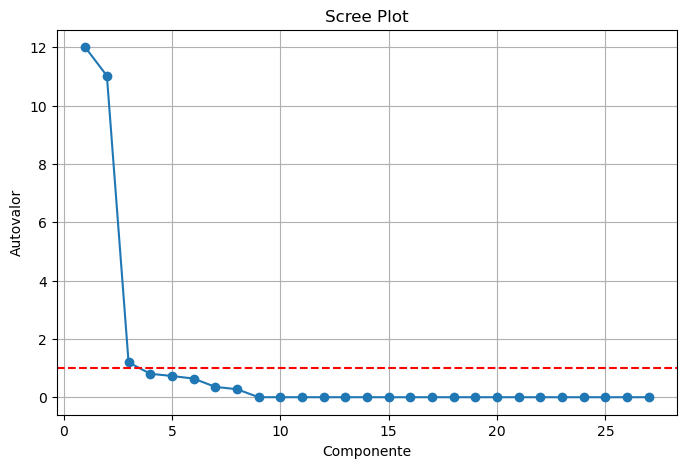

In [75]:
#Paso 5 – Scree plot (gráfico de sedimentación)
# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(autovalores)+1), autovalores, marker='o')
plt.axhline(y=1, color='red', linestyle='--')
plt.title("Scree Plot")
plt.xlabel("Componente")
plt.ylabel("Autovalor")
plt.grid(True)
plt.show()

In [76]:
#Paso 6 – Matriz de componentes (cargas factoriales)
# Usar las columnas originales de df_clean, que son las mismas que se escalaron
feature_names = df_clean.columns

# Matriz de componentes (cargas factoriales)
n_retener = sum(autovalores > 1)
cargas = pd.DataFrame(
    pca.components_.T[:, :n_retener],
    columns=[f"Componente_{i+1}" for i in range(n_retener)],
    index=feature_names
)
print("\nMatriz de Componentes (Loadings):")
print(cargas.round(3))


Matriz de Componentes (Loadings):
                               Componente_1  Componente_2  Componente_3
study_hours_wk                        0.233        -0.089        -0.233
sleep_hours                           0.235        -0.162        -0.038
attendance_rate                      -0.141         0.060         0.611
assignments_on_time_rate             -0.116        -0.266        -0.163
procrastination_index                -0.260         0.007         0.048
self_efficacy                         0.006         0.299         0.016
stress                               -0.227         0.170         0.142
part_time_job_hours                   0.094         0.266         0.072
social_support                        0.174         0.233        -0.029
screen_time_nonstudy_hr              -0.021         0.273         0.082
extracurricular_hours                 0.040        -0.163         0.626
habit_consistency                    -0.040        -0.289         0.014
age                          

In [77]:
# ---------- Top 5 variables más influyentes por componente ----------
for pc in cargas.columns:
    print(f"\nVariables más influyentes en {pc}:")
    top_vars = cargas[pc].sort_values(key=lambda x: x.abs(), ascending=False).head(6)
    print(top_vars)


Variables más influyentes en Componente_1:
year_of_study                   0.272521
grade_Estadística_current_20   -0.266755
credits_enrolled                0.264415
procrastination_index          -0.259669
grade_Comunicación_prior_20    -0.258413
age                            -0.256454
Name: Componente_1, dtype: float64

Variables más influyentes en Componente_2:
self_efficacy                    0.298787
habit_consistency               -0.288873
grade_Programación_prior_20      0.282562
grade_Programación_current_20   -0.281357
screen_time_nonstudy_hr          0.273097
part_time_job_hours              0.266171
Name: Componente_2, dtype: float64

Variables más influyentes en Componente_3:
extracurricular_hours          0.626191
attendance_rate                0.611203
study_hours_wk                -0.232842
year_of_study                  0.164806
assignments_on_time_rate      -0.162557
grade_Comunicación_prior_20   -0.160156
Name: Componente_3, dtype: float64


##### 🎯 Resultados del PCA

El análisis de componentes principales (PCA) sobre las **27 variables estudiadas** muestra que los **3 primeros componentes** explican gran parte de la varianza. A continuación se presenta la interpretación:


| **Componente** | **Variables principales (cargas altas)** | **Interpretación** |
|----------------|-------------------------------------------|---------------------|
| **Componente 1 – Trayectoria académica y madurez** | `year_of_study (+)`, `credits_enrolled (+)`, `age (−)`, `procrastination_index (−)`, `grade_Estadística_current_20 (−)`, `grade_Comunicación_prior_20 (−)` | Representa un eje de **avance académico**: estudiantes con más años y créditos inscritos frente a estudiantes más jóvenes que presentan procrastinación y bajo rendimiento en cursos clave. |
| **Componente 2 – Autoeficacia y gestión personal** | `self_efficacy (+)`, `habit_consistency (−)`, `grade_Programación_prior_20 (−)`, `grade_Programación_current_20 (−)`, `screen_time_nonstudy_hr (+)`, `part_time_job_hours (+)` | Refleja el balance entre **recursos personales y académicos**: estudiantes con alta autoeficacia y mayor exposición a pantallas/trabajo externo, frente a aquellos con bajos hábitos consistentes y notas débiles en programación. |
| **Componente 3 – Compromiso institucional y extracurricular** | `extracurricular_hours (+)`, `attendance_rate (+)`, `study_hours_wk (−)`, `year_of_study (+)`, `assignments_on_time_rate (−)`, `grade_Comunicación_prior_20 (−)` | Diferencia a los estudiantes con mayor **participación extracurricular y asistencia** de aquellos con menos horas de estudio formal, menor cumplimiento de tareas y calificaciones más bajas en comunicación. |

---

✅ En conclusión, el PCA revela que el perfil de los estudiantes puede resumirse en **3 dimensiones principales**:
1. **Trayectoria académica y madurez**  
2. **Autoeficacia y gestión personal**  
3. **Compromiso institucional y extracurricular**

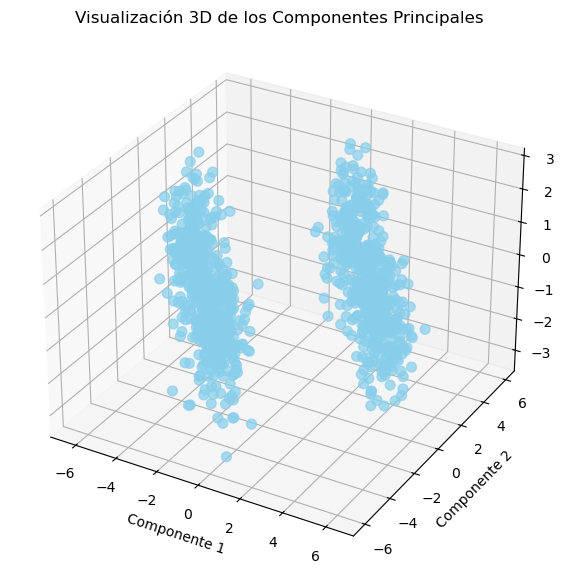

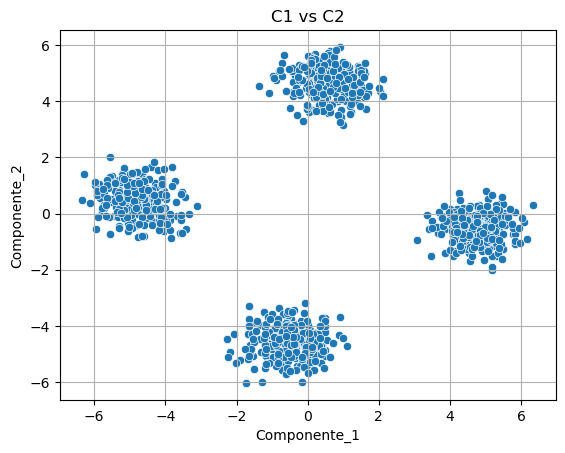

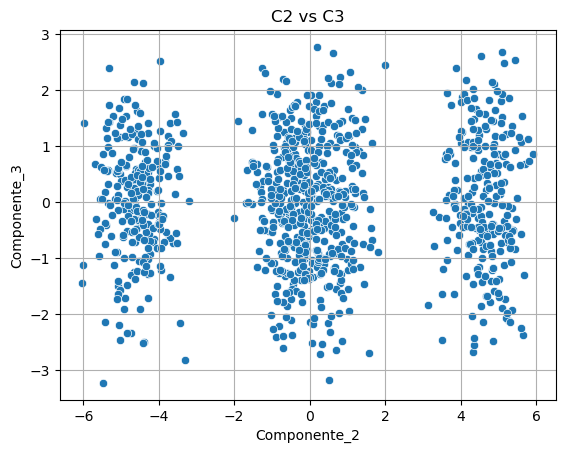

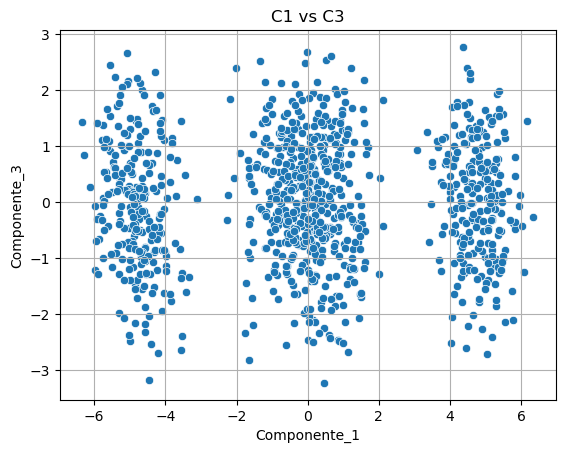

In [78]:
from mpl_toolkits.mplot3d import Axes3D

# Proyección de datos con las componentes retenidas
pca_final = PCA(n_components=n_retener)
data_proj = pca_final.fit_transform(data_scaled)
df_pca = pd.DataFrame(data_proj, columns=[f"Componente_{i+1}" for i in range(n_retener)])

# Gráfico 3D (solo si hay al menos 3 componentes retenidos)
if n_retener >= 3:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df_pca["Componente_1"], df_pca["Componente_2"], df_pca["Componente_3"],
               c='skyblue', s=50, alpha=0.7)
    ax.set_title("Visualización 3D de los Componentes Principales")
    ax.set_xlabel("Componente 1")
    ax.set_ylabel("Componente 2")
    ax.set_zlabel("Componente 3")
    plt.show()

# Gráficos 2D (siempre disponibles)
if n_retener >= 2:
    sns.scatterplot(x="Componente_1", y="Componente_2", data=df_pca).set_title("C1 vs C2")
    plt.grid(True)
    plt.show()

if n_retener >= 3:
    sns.scatterplot(x="Componente_2", y="Componente_3", data=df_pca).set_title("C2 vs C3")
    plt.grid(True)
    plt.show()

    sns.scatterplot(x="Componente_1", y="Componente_3", data=df_pca).set_title("C1 vs C3")
    plt.grid(True)
    plt.show()


In [79]:
import pandas as pd

# ==========================
# 1) Obtener los scores PCA
# ==========================
# Esto te da la "posición" de cada estudiante en los componentes principales
X_pca = pca.transform(data_scaled)

# ==========================
# 2) Crear un DataFrame con esos componentes
# ==========================
# Supongamos que quieres los primeros 3 componentes
df_pca = pd.DataFrame(X_pca[:, :3], 
                      columns=['C1', 'C2', 'C3'], 
                      index=data.index)

# ==========================
# 3) Unirlo a tu DataFrame original
# ==========================
data_final = pd.concat([data, df_pca], axis=1)

# ==========================
# 4) (Opcional) Guardar
# ==========================
data_final.to_csv("estudiantes_con_PCA.csv", index=False)

# Ver primeras filas
print(data_final.head())
data_final.head()

   study_hours_wk  sleep_hours  lms_activity_rate  attendance_rate  \
0       13.675912     7.844978          66.964681        81.874974   
1       13.466737     8.179369          72.621295        84.235342   
2       14.464209     8.176980          70.569146        81.577863   
3       12.957480     8.436137          77.400928        87.668652   
4       12.752495     8.148688          74.805515        81.846365   

   assignments_on_time_rate  procrastination_index  self_efficacy     stress  \
0                 68.209130              47.941762      60.678050  43.664949   
1                 70.308999              47.908609      56.925206  42.669400   
2                 72.519438              47.931619      56.084815  40.597457   
3                 73.797887              46.902252      56.388493  43.096292   
4                 73.153495              45.946799      57.239238  41.892244   

   internet_quality  part_time_job_hours  ...  grade_Ética_current_20  \
0         72.620031      

,study_hours_wk,sleep_hours,lms_activity_rate,attendance_rate,assignments_on_time_rate,procrastination_index,self_efficacy,stress,internet_quality,part_time_job_hours,...,grade_Ética_current_20,student_id,cluster_label_true,major,primary_device,internet_type,cohort,C1,C2,C3
0,13.675912,7.844978,66.964681,81.874974,68.209130,47.941762,60.678050,43.664949,72.620031,7.339488,...,12.490938,620.436883,A,Psicología,Laptop,Fibra,2023,5.153262,-0.115822,1.391630
1,13.466737,8.179369,72.621295,84.235342,70.308999,47.908609,56.925206,42.669400,67.852973,6.860263,...,11.440954,780.919440,A,Psicología,Laptop,Fibra,2025,4.475089,-1.263103,2.389915
2,14.464209,8.176980,70.569146,81.577863,72.519438,47.931619,56.084815,40.597457,72.283311,7.390099,...,12.246119,709.528028,A,Industrial,Smartphone,Fibra,2025,5.161191,-0.879838,0.340396
3,12.957480,8.436137,77.400928,87.668652,73.797887,46.902252,56.388493,43.096292,68.025160,7.110476,...,12.663074,827.095583,A,Sistemas,Laptop,Fibra,2024,4.564998,-0.506647,1.505394
4,12.752495,8.148688,74.805515,81.846365,73.153495,45.946799,57.239238,41.892244,69.230942,6.305688,...,12.286619,649.522843,A,Sistemas,Smartphone,Cable,2025,4.531446,-1.406939,0.532913


#### 🎯 Interpretación de los gráficos PCA (C1, C2 y C3)

A partir de la visualización de los tres primeros componentes principales, se pueden identificar patrones y agrupaciones en los estudiantes:

---

##### 📊 Visualización 3D (C1, C2 y C3)
- Los puntos no están dispersos al azar, sino que forman **agrupaciones claras**.
- Esto sugiere la existencia de **perfiles estudiantiles diferenciados**.
- Los tres componentes influyen en la separación:
  - **C1 – Trayectoria académica y madurez**.
  - **C2 – Autoeficacia y gestión personal**.
  - **C3 – Compromiso institucional y extracurricular**.

👉 El PCA logra separar perfiles de estudiantes con características similares.

---

##### 📈 C1 vs C2
- Contrasta **avance académico (años de estudio, créditos, procrastinación, rendimiento en cursos clave)** con **autoeficacia, hábitos y desempeño en programación**.
- Se observa una clara separación en función del **rendimiento académico (C1)**.
- Dentro de cada grupo de rendimiento, el eje **C2** añade variabilidad según el nivel de autoeficacia y hábitos.

👉 Conclusión: **el rendimiento académico es el factor central de diferenciación, mientras que la autoeficacia y hábitos matizan las diferencias dentro de cada grupo**.

---

##### 📈 C2 vs C3
- Contrasta **autoeficacia y hábitos (C2)** con **participación extracurricular y asistencia (C3)**.
- La dispersión es más continua, sin grupos tan compactos.
- Esto indica que la **participación en actividades externas no sigue un patrón fijo respecto a la autoeficacia**, y varía de forma diversa entre estudiantes.

👉 Conclusión: **los estudiantes administran de manera muy heterogénea la relación entre hábitos personales y actividades externas**.

---

##### 📈 C1 vs C3
- Contrasta **trayectoria académica (C1)** con **compromiso institucional y extracurricular (C3)**.
- Se forman dos grandes núcleos según el **rendimiento académico (alto vs. bajo)**.
- El eje **C3** introduce variaciones adicionales: dentro de cada grupo académico hay estudiantes con mayor o menor participación en actividades externas.

👉 Conclusión: **C1 (trayectoria académica) es el eje más fuerte de segmentación, mientras que C3 refleja el nivel de compromiso y actividades extracurriculares dentro de cada grupo académico**.



## Cluster

In [80]:
# ============================================
# Pipeline de Clustering para EDU-INSIGHT 360
# EDA resumido → Selección → Escalado → KMeans → Perfiles → Export
# ============================================

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import cdist
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [81]:
# ==================== 1. Seleccionar PCAs ====================
X = df_scaled

# Determinar el número óptimo de clusters
def encontrar_k_optimo(X, max_k=8):
    resultados = []
    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
        labels = kmeans.labels_
        resultados.append({
            "k": k,
            "silhouette": silhouette_score(X, labels),
            "davies_bouldin": davies_bouldin_score(X, labels),
            "calinski_harabasz": calinski_harabasz_score(X, labels),
            "inercia": kmeans.inertia_
        })
    
    scores_df = pd.DataFrame(resultados)
    optimal_k = scores_df.loc[scores_df["silhouette"].idxmax(), "k"]
    return optimal_k, scores_df

# Obtener k óptimo (según Silhouette)
optimal_k, scores_df = encontrar_k_optimo(df_scaled)

# Mostrar tabla
display(scores_df)

print(f"\nEl número óptimo de clusters es: {optimal_k}")


,k,silhouette,davies_bouldin,calinski_harabasz,inercia
0,2,0.405532,1.167608,716.587283,15715.735367
1,3,0.447197,0.806320,825.270759,10167.545936
2,4,0.577120,0.629563,1586.645990,4672.044790
3,5,0.476270,1.159846,1265.228780,4436.158610
4,6,0.366429,1.569093,1065.069049,4246.958974
5,7,0.263197,1.883865,940.749208,4039.324926



El número óptimo de clusters es: 4


##### 📊 Métricas de Evaluación de Clusters
###### Silhouette (↑ mejor)

| Rango	| Interpretación |
|-------|----------------|
|< 0.20 | Sin estructura clara|
|0.20–0.50|	Estructura débil pero presente|
|0.50–0.70|Estructura razonable|
|> 0.70|	Estructura fuerte |

###### Davies–Bouldin (↓ mejor)

|Valor|Interpretación|
|-|-|
|< 1.0|Buena separación|
|1.0–2.0|	Separación moderada|
|> 2.0|	Clusters solapados|

###### Calinski–Harabasz (↑ mejor)

- Comparativo: valores más altos indican clusters más densos y mejor separados.

##### ✅ Interpretación

- k=4 es óptimo en las tres métricas.

- Silhouette ≈ 0.58 → estructura débil pero presente.

- Davies–Bouldin ≈ 0.6 → separación moderada.

- Calinski–Harabasz = 1586 → clusters más compactos y definidos en comparación con otros k.

- Los resultados indican una segmentación cuaternaria natural, aunque con baja calidad global de clustering.

In [82]:
def kmeans_spss(X, k, max_iter=100):
    centros = X[np.random.choice(len(X), k, replace=False)]
    historial = [centros]
    
    for i in range(max_iter):
        distancias = np.linalg.norm(X[:, None] - centros, axis=2)
        labels = np.argmin(distancias, axis=1)
        nuevos_centros = np.array([X[labels == i].mean(0) for i in range(k)])
        historial.append(nuevos_centros)
        
        cambios = np.linalg.norm(historial[-1] - historial[-2], axis=1)
        
        if np.max(cambios) < 1e-6: 
            break
        centros = nuevos_centros
    
    # Tabla estilo SPSS
    tabla_iteraciones = []
    for i in range(1, len(historial)):
        cambios_iter = np.linalg.norm(historial[i] - historial[i-1], axis=1)
        fila = {'Iteration': i}
        for j in range(k):
            fila[f'C{j+1}'] = f"{cambios_iter[j]:.3f}"
        tabla_iteraciones.append(fila)
    
    return labels, centros, pd.DataFrame(tabla_iteraciones), len(historial) - 1

# ==================== EJECUTAR TODO EN UN SOLO KMEANS ====================
labels, centros, df_iterations, total_iter = kmeans_spss(df_scaled.values, optimal_k)

In [83]:
# ==================== 3. Historial de iteraciones ====================

# Mostrar tabla estilo SPSS
print("Iteration History")
print("Change in Cluster Centers")
display(df_iterations)

print(f"\nConvergencia lograda debido a que no se produjeron cambios o estos fueron mínimos en los centros de los clústeres..")
print(f"El cambio máximo absoluto de coordenadas para cualquier centro es {df_iterations.iloc[-1, 1:].astype(float).max():.3f}.")
print(f"La iteración actual es {total_iter}.")


Iteration History
Change in Cluster Centers


,Iteration,C1,C2,C3,C4
0,1,4.851,2.069,3.280,2.002
1,2,1.716,1.974,2.752,1.106
2,3,0.000,0.128,0.469,0.000
3,4,0.000,0.000,0.000,0.000



Convergencia lograda debido a que no se produjeron cambios o estos fueron mínimos en los centros de los clústeres..
El cambio máximo absoluto de coordenadas para cualquier centro es 0.000.
La iteración actual es 4.


📊 Generando matriz de gráficos para 27 variables...
Mostrando las 6 variables más importantes


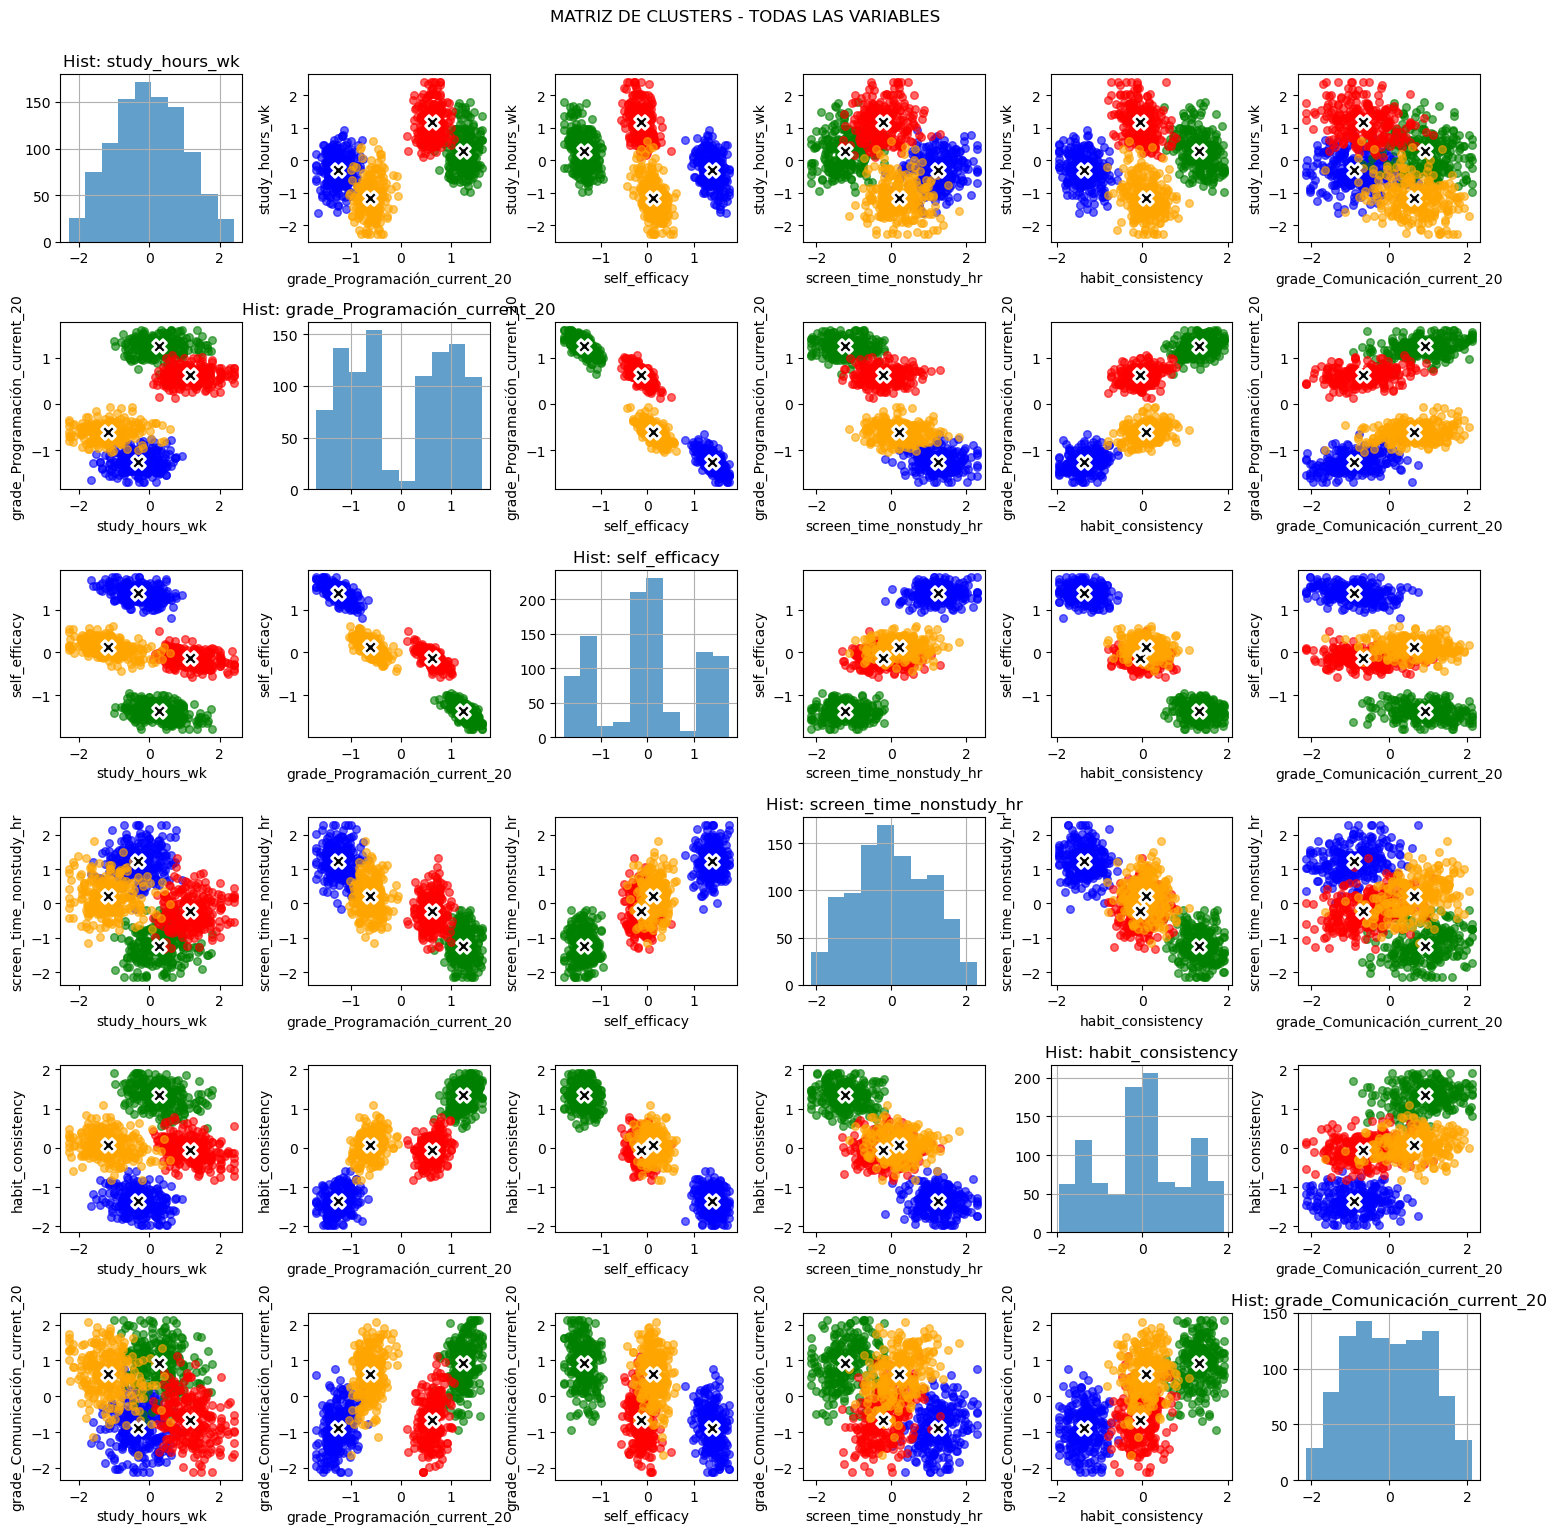


🔍 Gráficos de pares consecutivos:


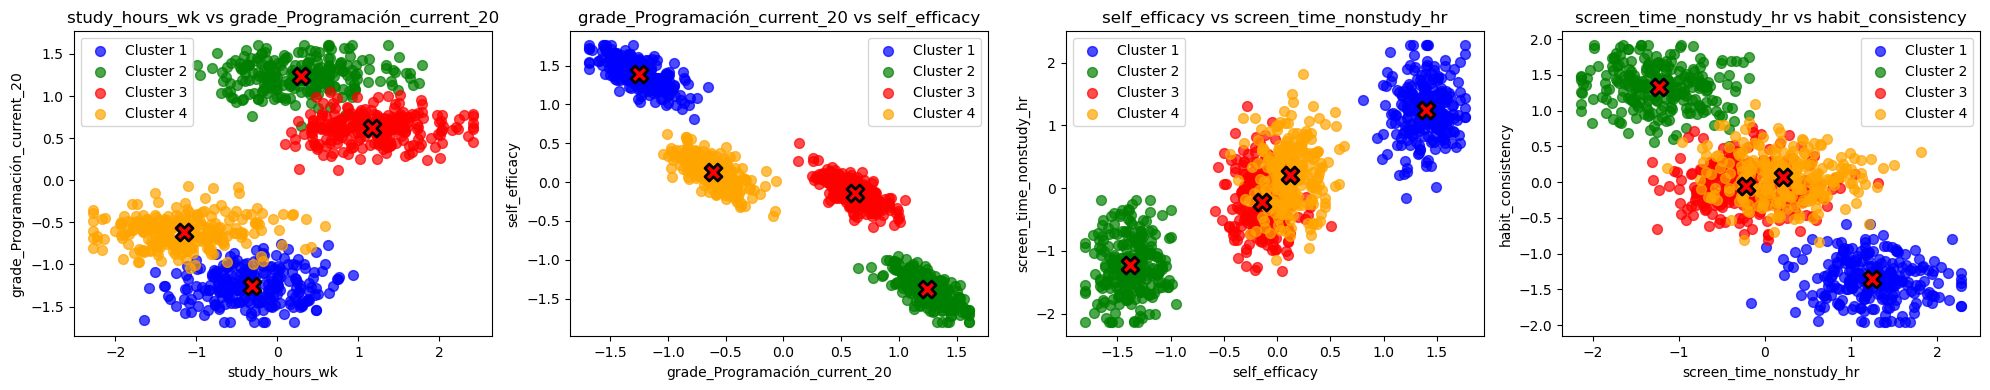

✅ Análisis completado: 6 variables, 4 clusters, 4 iteraciones


In [84]:
# ==================== 5. GRÁFICOS CON TODAS LAS VARIABLES ====================

# Crear DataFrame de centroides
centroides_df = pd.DataFrame(centros, columns=df_scaled.columns)

# Matriz de scatter plots para todas las variables
variables = df_scaled.columns.tolist()
n_vars = len(variables)

print(f"📊 Generando matriz de gráficos para {n_vars} variables...")

# Si hay muchas variables, hacer subconjunto
if n_vars > 6:
    # Seleccionar 6 variables más importantes
    var_importancia = df_scaled.std().sort_values(ascending=False)
    variables = var_importancia.head(6).index.tolist()
    n_vars = 6
    print(f"Mostrando las {n_vars} variables más importantes")

# Crear matriz de gráficos
fig, axes = plt.subplots(n_vars, n_vars, figsize=(15, 15))

# Colores para clusters
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown'][:optimal_k]

for i in range(n_vars):
    for j in range(n_vars):
        ax = axes[i, j]
        var_x = variables[j]
        var_y = variables[i]
        
        if i == j:
            # Diagonal: histograma de la variable
            df_scaled[var_x].hist(ax=ax, alpha=0.7)
            ax.set_title(f'Hist: {var_x}')
        else:
            # Scatter plot
            for cluster in range(optimal_k):
                mask = labels == cluster
                ax.scatter(df_scaled.iloc[mask][var_x], 
                          df_scaled.iloc[mask][var_y],
                          c=colors[cluster], alpha=0.6, s=30, label=f'Cluster {cluster+1}')
            
            # Centroides
            ax.scatter(centroides_df[var_x], centroides_df[var_y],
                      marker='X', s=100, c='black', edgecolors='white', linewidth=2)
            
            ax.set_xlabel(var_x)
            ax.set_ylabel(var_y)

plt.tight_layout()
plt.suptitle('MATRIZ DE CLUSTERS - TODAS LAS VARIABLES', y=1.02)
plt.show()

# ==================== 6. GRÁFICO DE PARES CONSECUTIVOS ====================
print("\n🔍 Gráficos de pares consecutivos:")

# Crear gráficos de variables consecutivas
n_pares = min(4, n_vars-1)  # Máximo 4 gráficos
fig, axes = plt.subplots(1, n_pares, figsize=(5*n_pares, 4))

if n_pares == 1:
    axes = [axes]

for idx in range(n_pares):
    var_x = variables[idx]
    var_y = variables[idx + 1]
    
    for cluster in range(optimal_k):
        mask = labels == cluster
        axes[idx].scatter(df_scaled.iloc[mask][var_x], 
                         df_scaled.iloc[mask][var_y],
                         c=colors[cluster], alpha=0.7, s=50, label=f'Cluster {cluster+1}')
    
    axes[idx].scatter(centroides_df[var_x], centroides_df[var_y],
                     marker='X', s=150, c='red', edgecolors='black', linewidth=2)
    
    axes[idx].set_xlabel(var_x)
    axes[idx].set_ylabel(var_y)
    axes[idx].set_title(f'{var_x} vs {var_y}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

print(f"✅ Análisis completado: {n_vars} variables, {optimal_k} clusters, {total_iter} iteraciones")

In [85]:
# ==================== 4. Pertenencia a clústeres ====================

# Calcular distancias a centroides
distancias = np.linalg.norm(df_scaled.values[:, None] - centros, axis=2)
distancias_min = np.min(distancias, axis=1)

# Crear tabla
tabla_pertenencia = pd.DataFrame({
    'Observacion': range(1, len(labels) + 1),
    'Cluster': labels + 1,
    'Distancia_Centroide': distancias_min.round(3)
})

# Agregar variables originales (primeras 5 columnas)
vars_mostrar = len(df_scaled.columns)
for i in range(vars_mostrar):
    tabla_pertenencia[df_scaled.columns[i]] = df_scaled.iloc[:, i].round(3)

# Mostrar tabla
display(tabla_pertenencia.head(100))

print(f"Mostrando 10 de {len(tabla_pertenencia)} observaciones")
print(f"Cluster distribution: {pd.Series(labels).value_counts().sort_index().to_dict()}")

,Observacion,Cluster,Distancia_Centroide,study_hours_wk,sleep_hours,attendance_rate,assignments_on_time_rate,procrastination_index,self_efficacy,stress,...,grade_Matemáticas_prior_20,grade_Matemáticas_current_20,grade_Programación_prior_20,grade_Programación_current_20,grade_Comunicación_prior_20,grade_Comunicación_current_20,grade_Estadística_prior_20,grade_Estadística_current_20,grade_Ética_prior_20,grade_Ética_current_20
0,1,3,2.355,0.991,0.897,-0.986,-1.081,-1.207,0.098,-1.034,...,-0.618,-0.872,-0.501,0.476,-1.531,-0.761,1.236,-1.338,0.839,-1.192
1,2,3,3.445,0.865,1.355,0.117,-0.854,-1.222,-0.224,-1.196,...,-0.037,-0.242,-0.828,0.876,-2.026,0.952,0.732,-0.947,0.848,-1.992
2,3,3,1.383,1.467,1.351,-1.125,-0.616,-1.212,-0.296,-1.534,...,-0.821,-0.590,-0.792,0.728,-1.258,-0.304,1.243,-1.325,1.083,-1.379
3,4,3,3.206,0.558,1.706,1.720,-0.478,-1.686,-0.270,-1.126,...,-1.549,-0.384,-0.860,0.918,-1.102,0.526,1.719,-1.408,1.463,-1.061
4,5,3,2.407,0.434,1.313,-0.999,-0.548,-2.127,-0.197,-1.323,...,-0.794,-0.413,-0.514,0.721,-0.856,0.680,1.834,-0.976,0.602,-1.348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,3,2.501,1.778,1.354,0.042,-0.352,-0.434,-0.292,-1.136,...,-0.771,-0.751,-0.843,0.912,-2.152,-0.851,0.256,-1.180,1.449,-1.992
96,97,3,3.070,2.409,1.298,-1.689,-0.957,-0.649,-0.268,-1.373,...,0.084,0.123,-0.646,0.782,-2.152,-0.988,0.793,-1.306,1.206,-1.085
97,98,3,2.713,1.357,1.336,-2.385,-0.087,-1.790,-0.225,-1.738,...,-0.824,-0.713,-0.245,0.400,-0.260,0.007,1.366,-1.030,0.973,-1.298
98,99,3,2.044,0.599,1.401,-0.267,-0.689,-2.211,-0.016,-1.047,...,-1.261,-0.585,-0.389,0.767,-1.480,-0.206,2.071,-1.304,1.024,-1.029


Mostrando 10 de 1000 observaciones
Cluster distribution: {0: 250, 1: 250, 2: 250, 3: 250}


In [86]:
# ==================== 5. Centros de clústeres finales ====================
tabla_centros = pd.DataFrame(
    centros,
    columns=df_scaled.columns,
    index=[f'Cluster {i+1}' for i in range(optimal_k)]
).round(3)

display(tabla_centros.T)

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
study_hours_wk,-0.312,0.293,1.171,-1.152
sleep_hours,-0.618,0.622,1.215,-1.220
attendance_rate,0.194,-0.169,-0.665,0.640
assignments_on_time_rate,-1.304,1.277,-0.405,0.432
procrastination_index,-0.137,0.118,-1.228,1.247
self_efficacy,1.392,-1.377,-0.139,0.123
stress,0.658,-0.663,-1.175,1.179
part_time_job_hours,1.291,-1.254,0.316,-0.352
social_support,1.184,-1.165,0.695,-0.714
screen_time_nonstudy_hr,1.244,-1.229,-0.224,0.209


In [87]:
# ==================== ANOVA ESTILO SPSS ====================
from scipy.stats import f_oneway

df_anova = df_scaled.copy()
df_anova['Cluster'] = labels + 1

# Calcular ANOVA
resultados = []
for variable in df_scaled.columns:
    grupos = [df_anova[df_anova['Cluster'] == i+1][variable] for i in range(optimal_k)]
    F, p_valor = f_oneway(*grupos)
    
    grand_mean = df_anova[variable].mean()
    ss_between = sum(len(g) * (g.mean() - grand_mean)**2 for g in grupos)
    ss_within = sum((g - g.mean()).var() * (len(g)-1) for g in grupos)
    
    df_between, df_within = optimal_k - 1, len(df_anova) - optimal_k
    ms_between, ms_within = ss_between/df_between, ss_within/df_within
    
    resultados.append({
        'Variable': variable, 'MS_Cluster': ms_between, 'df_Cluster': df_between,
        'MS_Error': ms_within, 'df_Error': df_within, 'F': F, 
        'Sig.': '<.001' if p_valor < 0.001 else f'{p_valor:.3f}'
    })

anova_spss = pd.DataFrame(resultados)
display(anova_spss.round(3))

,Variable,MS_Cluster,df_Cluster,MS_Error,df_Error,F,Sig.
0,study_hours_wk,240.182,3,0.281,996,856.032,<.001
1,sleep_hours,311.217,3,0.067,996,4671.771,<.001
2,attendance_rate,76.538,3,0.773,996,98.953,<.001
3,assignments_on_time_rate,306.820,3,0.080,996,3841.926,<.001
4,procrastination_index,257.901,3,0.227,996,1135.102,<.001
5,self_efficacy,322.362,3,0.033,996,9755.079,<.001
6,stress,303.535,3,0.090,996,3381.857,<.001
7,part_time_job_hours,288.599,3,0.135,996,2141.859,<.001
8,social_support,312.748,3,0.062,996,5044.122,<.001
9,screen_time_nonstudy_hr,262.789,3,0.212,996,1236.756,<.001


In [88]:
# ==================== TABLA COMPLETA DE TODAS LAS VARIABLES ====================
tabla_completa = []
for variable in df_scaled.columns:
    medias = [df_anova[df_anova['Cluster'] == i+1][variable].mean() for i in range(optimal_k)]
    cluster_max = medias.index(max(medias))
    
    fila = {'Variable': variable}
    for i in range(optimal_k):
        fila[f'Grupo {i+1}'] = 'X' if i == cluster_max else ''
    tabla_completa.append(fila)

df_completo = pd.DataFrame(tabla_completa).set_index('Variable')
display(df_completo)

,Grupo 1,Grupo 2,Grupo 3,Grupo 4
Variable,,,,
study_hours_wk,,,X,
sleep_hours,,,X,
attendance_rate,,,,X
assignments_on_time_rate,,X,,
procrastination_index,,,,X
self_efficacy,X,,,
stress,,,,X
part_time_job_hours,X,,,
social_support,X,,,


In [89]:
# ==================== VARIABLES MÁS IMPORTANTES (TOP 10 POR F) ====================
top_10_vars = anova_spss.nlargest(10, 'F')['Variable'].tolist()
df_top10 = df_completo.loc[top_10_vars]

print("VARIABLES MÁS IMPORTANTES (Top 10 por F)")
display(df_top10)

VARIABLES MÁS IMPORTANTES (Top 10 por F)


,Grupo 1,Grupo 2,Grupo 3,Grupo 4
Variable,,,,
grade_Programación_current_20,,X,,
self_efficacy,X,,,
grade_Estadística_current_20,,,,X
attendance_lab,,X,,
credits_enrolled,,,X,
grade_Programación_prior_20,X,,,
social_support,X,,,
sleep_hours,,,X,
age,,,,X


✅ Variables categorizadas: 14
Variables: ['study_hours_wk', 'sleep_hours', 'attendance_rate', 'assignments_on_time_rate', 'procrastination_index', 'self_efficacy', 'stress', 'lms_activity_rate', 'grade_Matemáticas_current_20', 'grade_Programación_current_20', 'part_time_job_hours', 'commute_min', 'social_support', 'screen_time_nonstudy_hr']


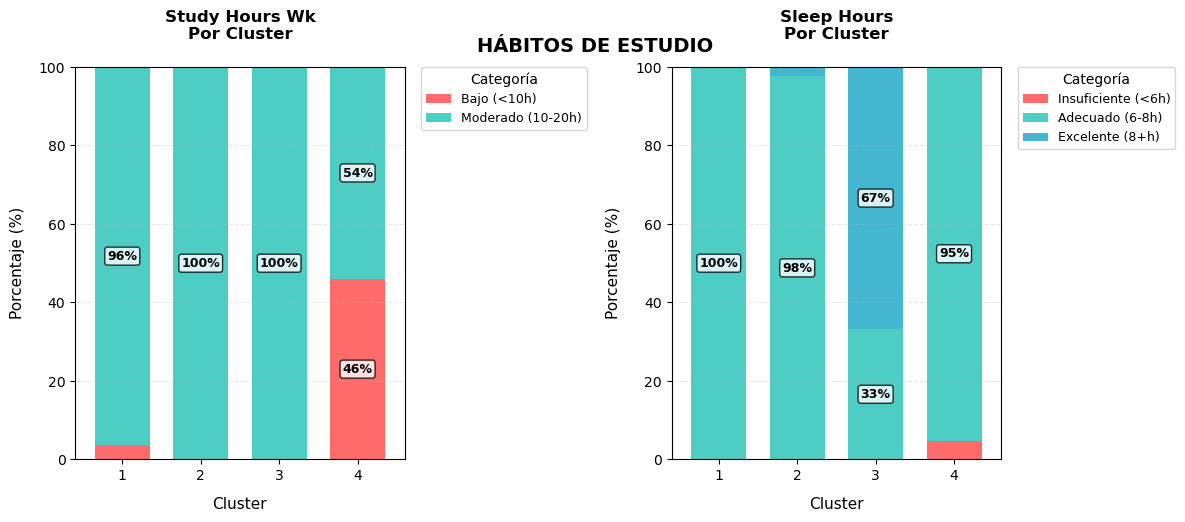

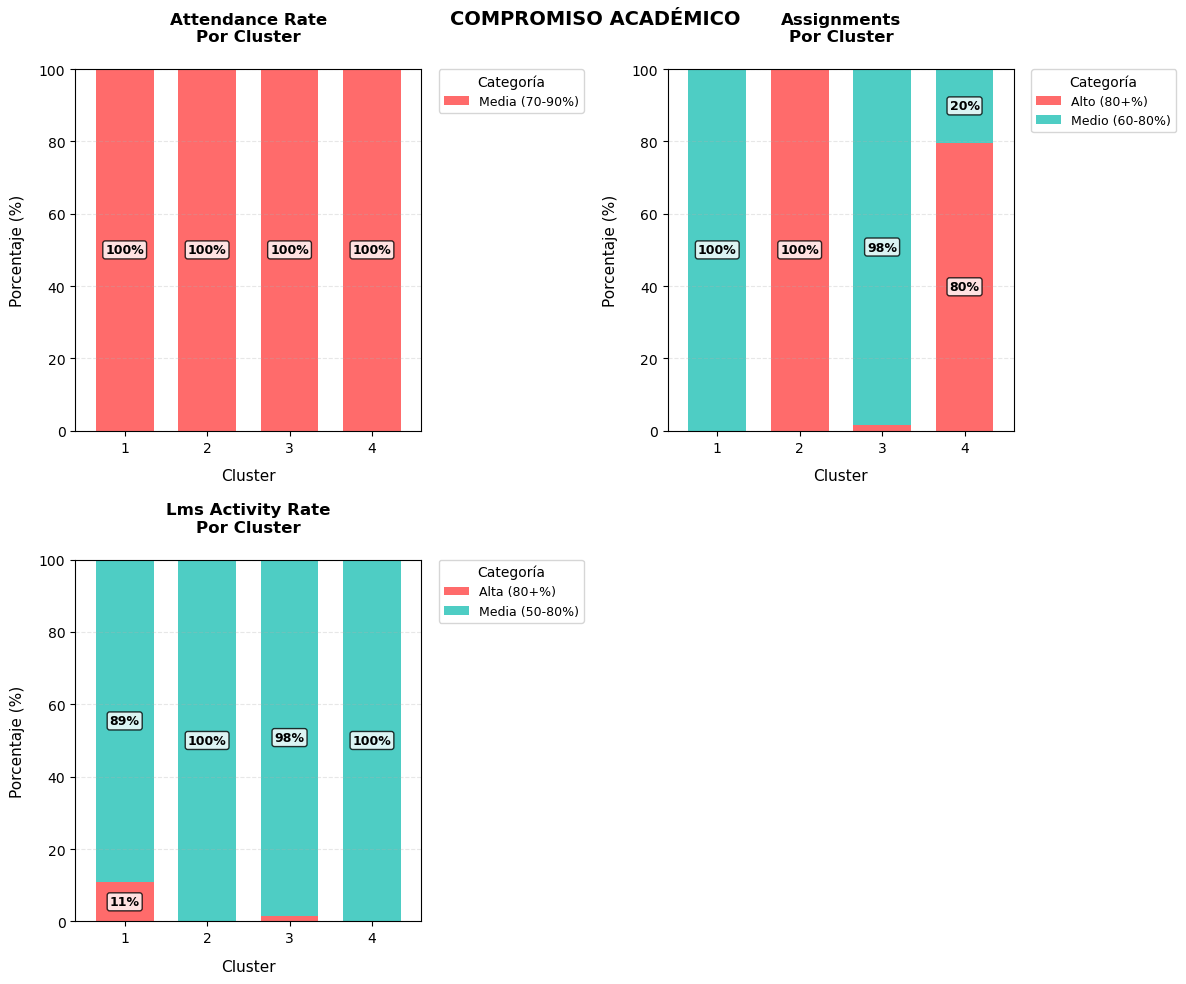

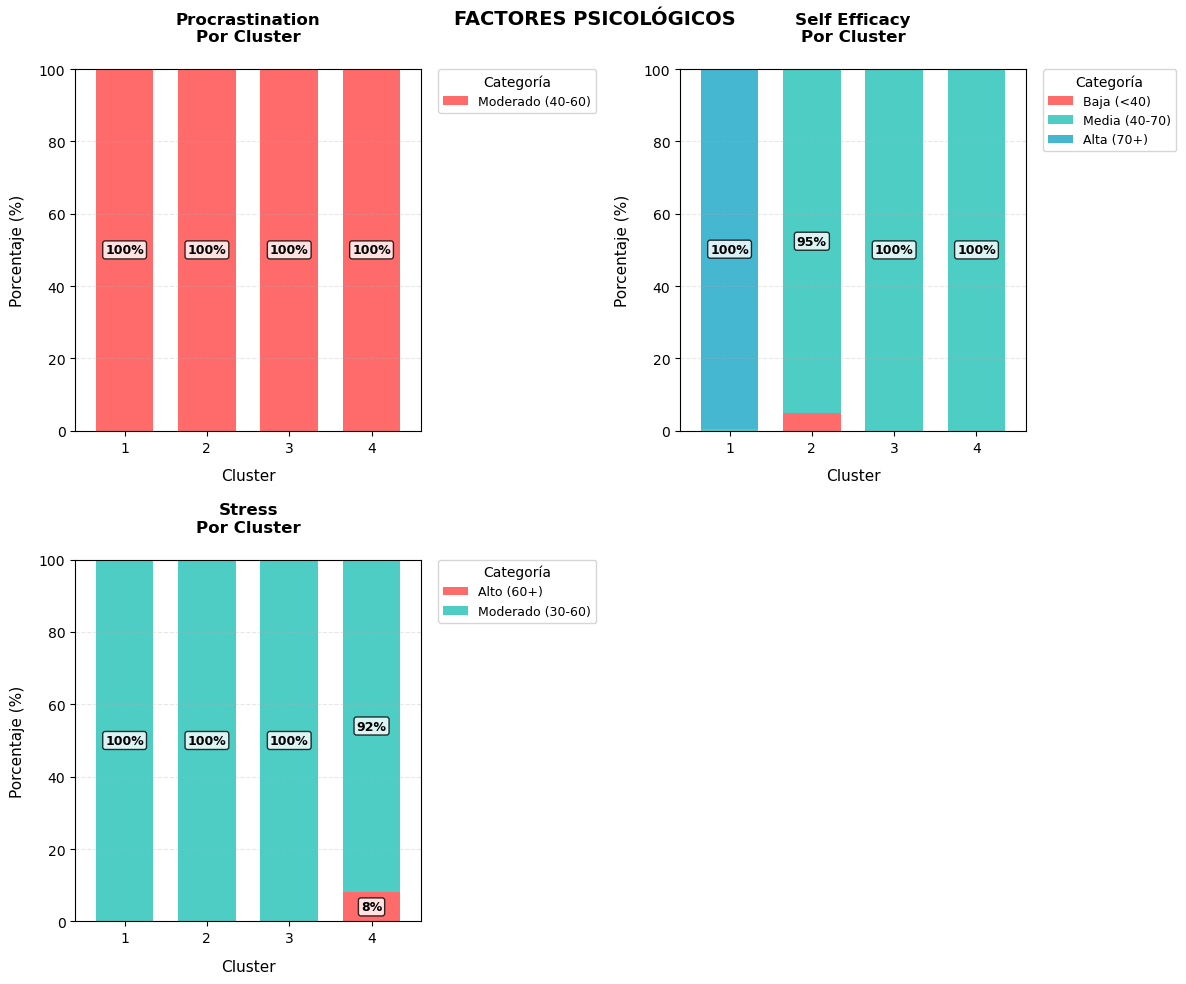

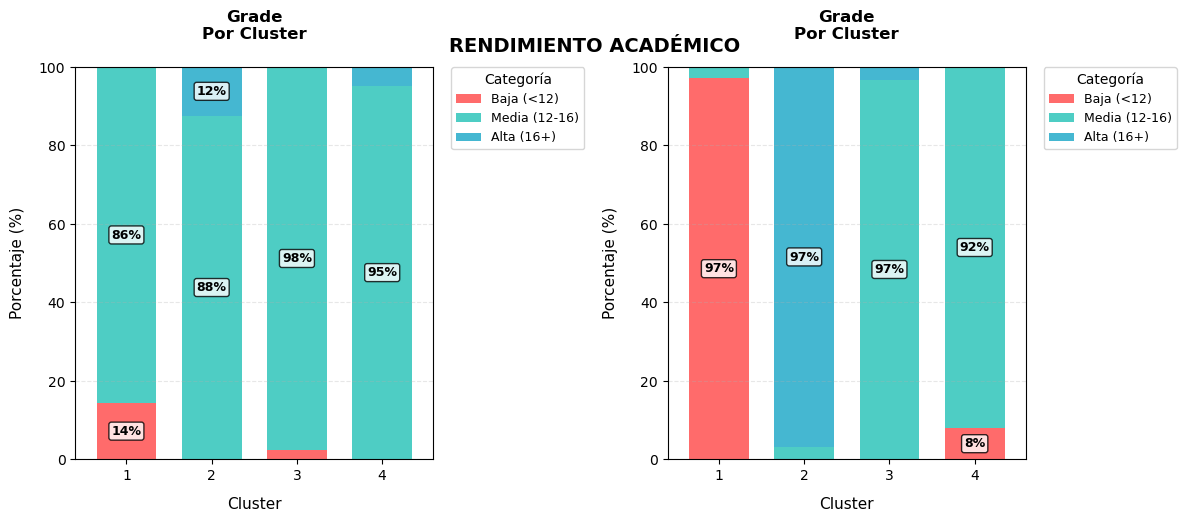

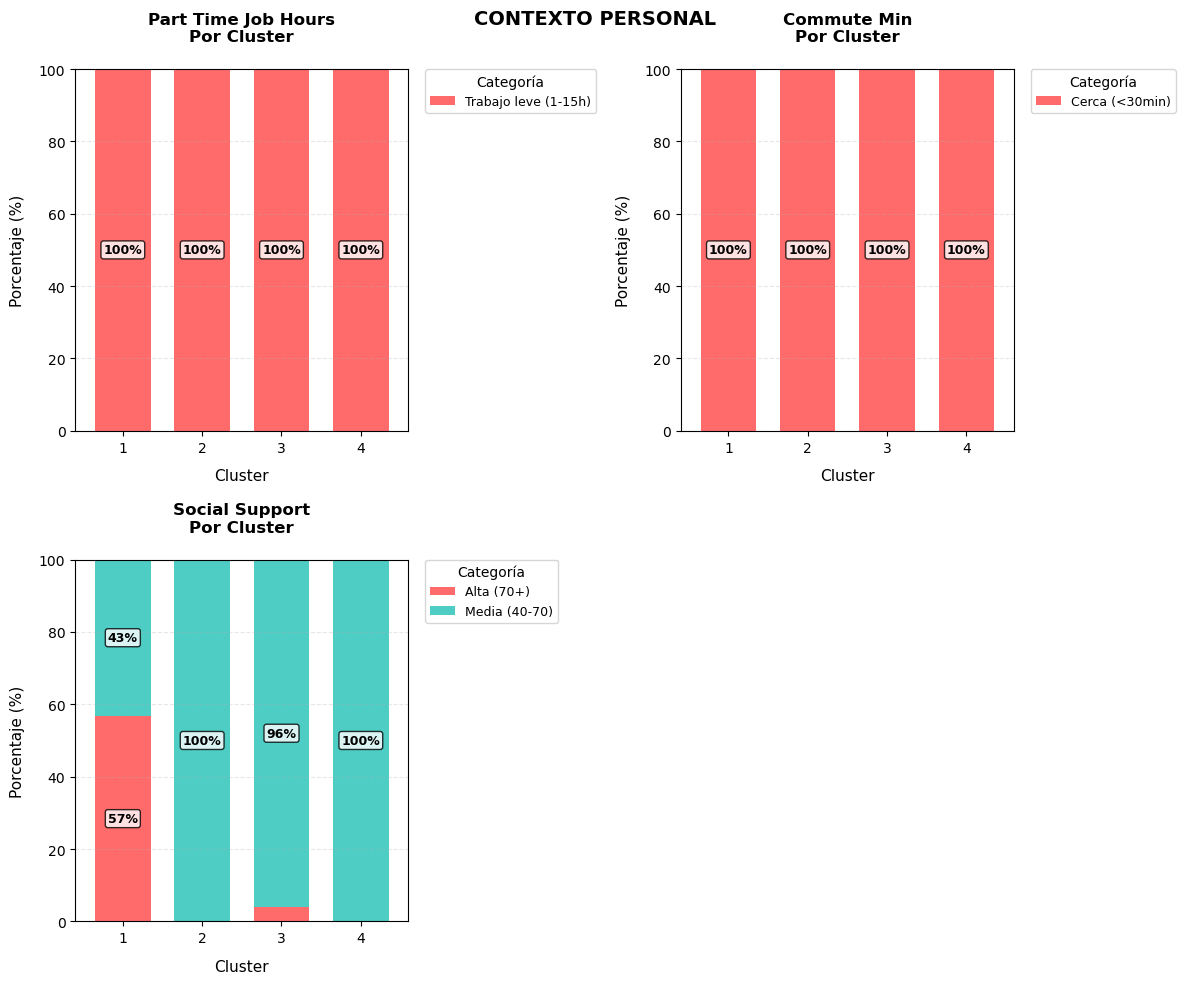

📈 VERSIÓN SIMPLIFICADA - 1 VARIABLE POR GRÁFICO


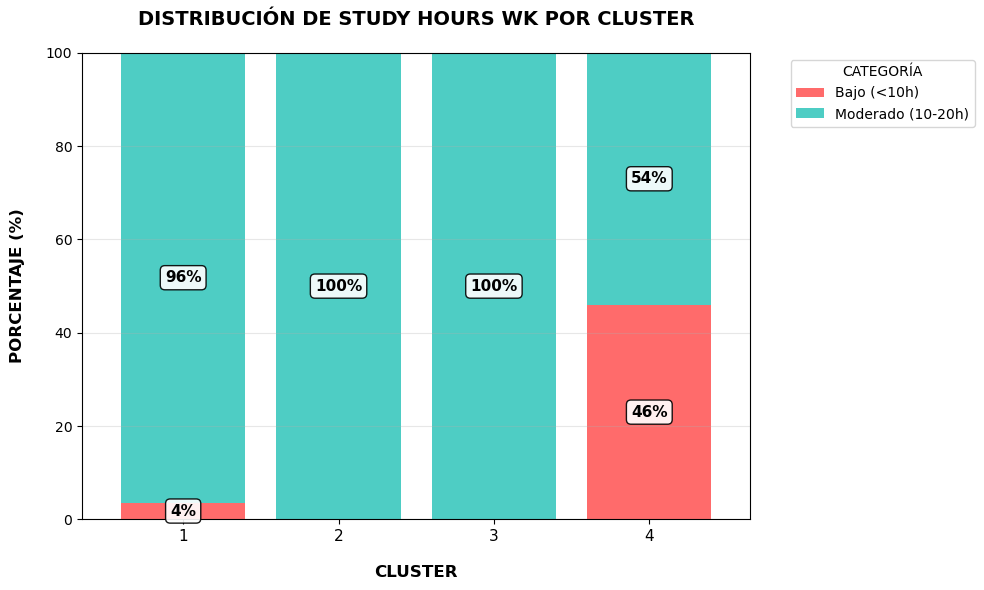

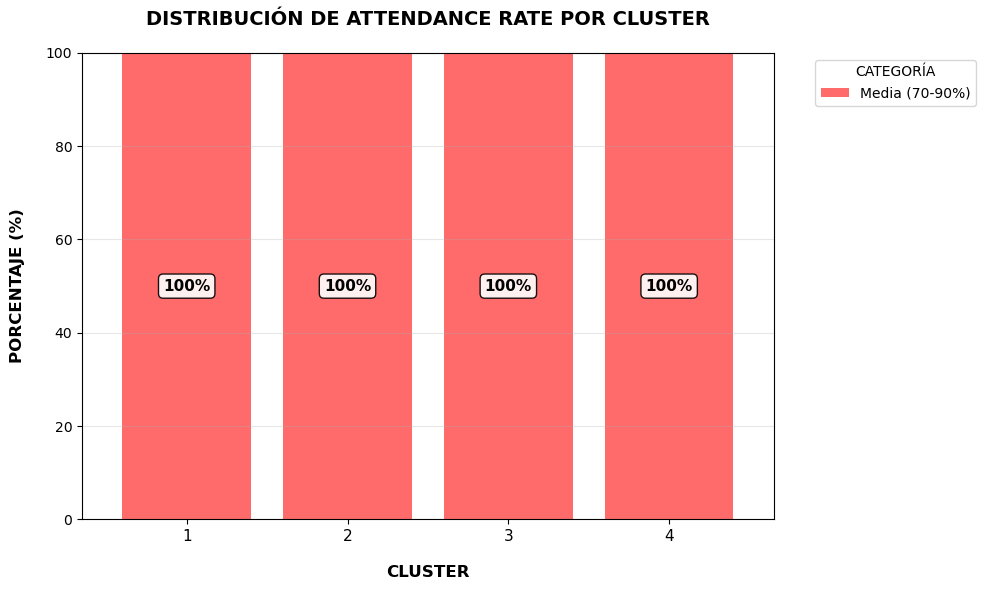

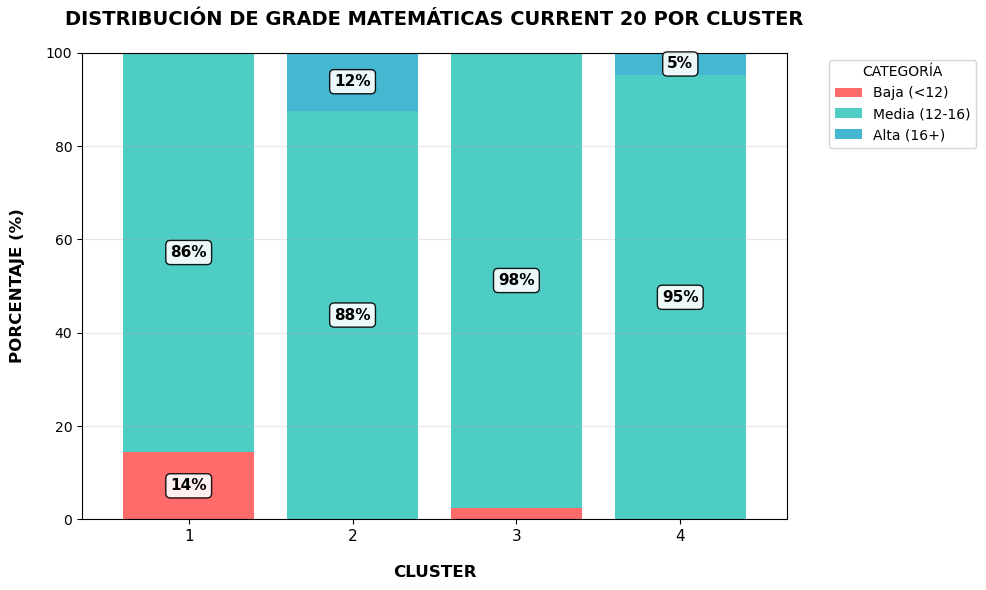

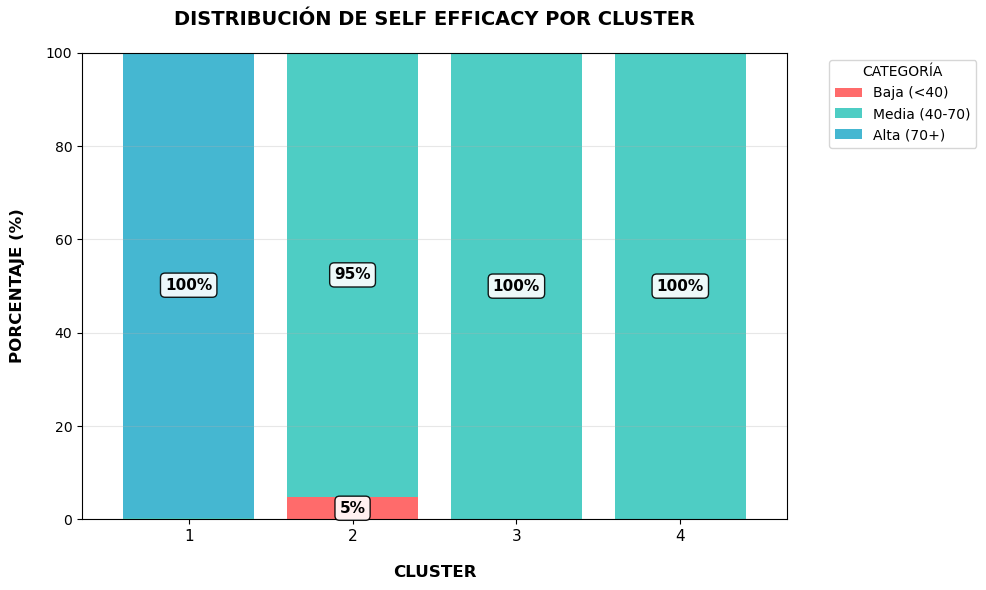

🎯 GRÁFICOS POR CATEGORÍA (NO APILADOS)


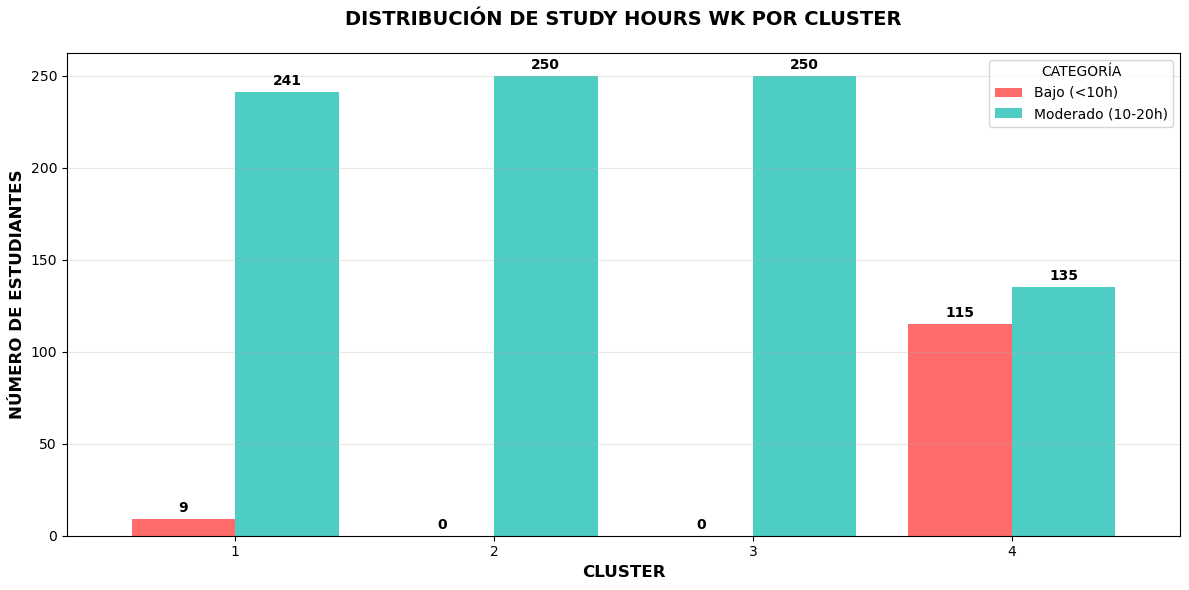

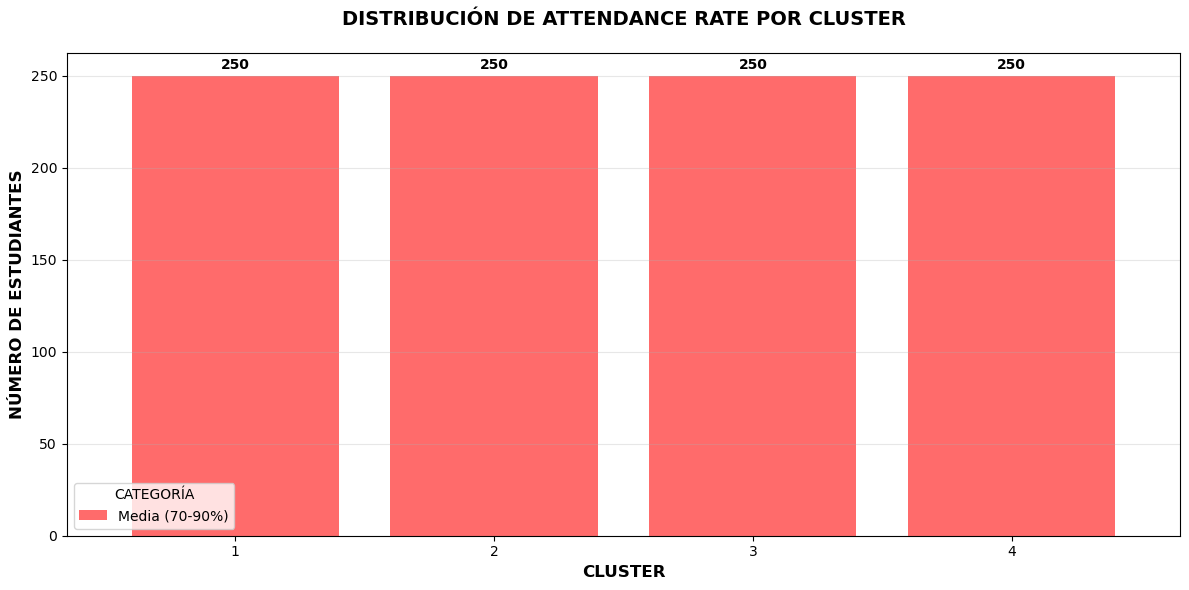

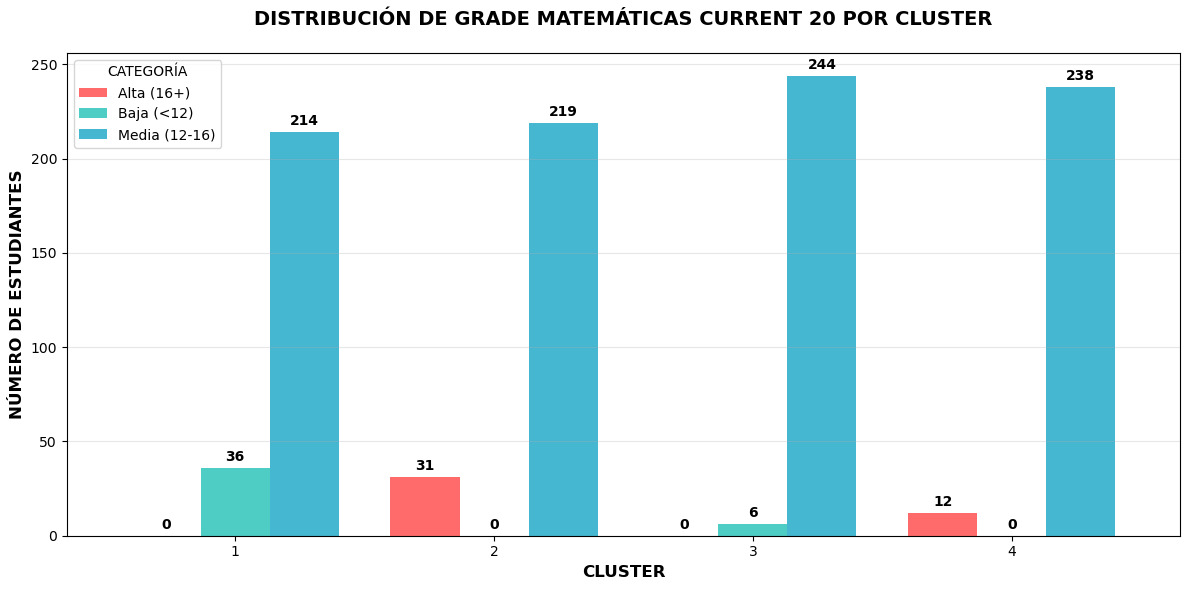

In [92]:
# ==================== GRÁFICOS MEJORADOS SIN SOLAPAMIENTO ====================

# Configuración para evitar solapamiento
plt.rcParams.update({'font.size': 10, 'font.family': 'DejaVu Sans'})

# ==================== CATEGORÍAS LÓGICAS PARA TODAS LAS VARIABLES ====================

# Definir categorías lógicas para TODAS las variables relevantes
categorias_logicas_completas = {
    # Hábitos de estudio
    'study_hours_wk': {
        'Bajo (<10h)': lambda x: x < 10,
        'Moderado (10-20h)': lambda x: (x >= 10) & (x < 20),
        'Alto (20+h)': lambda x: x >= 20
    },
    'sleep_hours': {
        'Insuficiente (<6h)': lambda x: x < 6,
        'Adecuado (6-8h)': lambda x: (x >= 6) & (x < 8),
        'Excelente (8+h)': lambda x: x >= 8
    },
    # Compromiso académico
    'attendance_rate': {
        'Baja (<70%)': lambda x: x < 70,
        'Media (70-90%)': lambda x: (x >= 70) & (x < 90),
        'Alta (90+%)': lambda x: x >= 90
    },
    'assignments_on_time_rate': {
        'Bajo (<60%)': lambda x: x < 60,
        'Medio (60-80%)': lambda x: (x >= 60) & (x < 80),
        'Alto (80+%)': lambda x: x >= 80
    },
    # Factores psicológicos
    'procrastination_index': {
        'Bajo (<40)': lambda x: x < 40,
        'Moderado (40-60)': lambda x: (x >= 40) & (x < 60),
        'Alto (60+)': lambda x: x >= 60
    },
    'self_efficacy': {
        'Baja (<40)': lambda x: x < 40,
        'Media (40-70)': lambda x: (x >= 40) & (x < 70),
        'Alta (70+)': lambda x: x >= 70
    },
    'stress': {
        'Bajo (<30)': lambda x: x < 30,
        'Moderado (30-60)': lambda x: (x >= 30) & (x < 60),
        'Alto (60+)': lambda x: x >= 60
    },
    # LMS y tecnología
    'lms_activity_rate': {
        'Baja (<50%)': lambda x: x < 50,
        'Media (50-80%)': lambda x: (x >= 50) & (x < 80),
        'Alta (80+%)': lambda x: x >= 80
    },
    # Calificaciones (escala 0-20)
    'grade_Matemáticas_current_20': {
        'Baja (<12)': lambda x: x < 12,
        'Media (12-16)': lambda x: (x >= 12) & (x < 16),
        'Alta (16+)': lambda x: x >= 16
    },
    'grade_Programación_current_20': {
        'Baja (<12)': lambda x: x < 12,
        'Media (12-16)': lambda x: (x >= 12) & (x < 16),
        'Alta (16+)': lambda x: x >= 16
    },
    # Factores contextuales
    'part_time_job_hours': {
        'No trabaja (0h)': lambda x: x == 0,
        'Trabajo leve (1-15h)': lambda x: (x > 0) & (x <= 15),
        'Trabajo intenso (15+h)': lambda x: x > 15
    },
    'commute_min': {
        'Cerca (<30min)': lambda x: x < 30,
        'Moderado (30-60min)': lambda x: (x >= 30) & (x < 60),
        'Lejos (60+min)': lambda x: x >= 60
    },
    'social_support': {
        'Baja (<40)': lambda x: x < 40,
        'Media (40-70)': lambda x: (x >= 40) & (x < 70),
        'Alta (70+)': lambda x: x >= 70
    },
    'screen_time_nonstudy_hr': {
        'Bajo (<2h)': lambda x: x < 2,
        'Moderado (2-4h)': lambda x: (x >= 2) & (x < 4),
        'Alto (4+h)': lambda x: x >= 4
    }
}

# Aplicar categorías lógicas a TODAS las variables disponibles
df_categorizado_completo = data.copy()
df_categorizado_completo['Cluster'] = labels + 1

variables_aplicadas = []
for var, categorias in categorias_logicas_completas.items():
    if var in data.columns:
        df_categorizado_completo[f'{var}_cat'] = 'No categorizado'  # Valor por defecto
        for categoria_name, condicion in categorias.items():
            mask = condicion(data[var])
            df_categorizado_completo.loc[mask, f'{var}_cat'] = categoria_name
        variables_aplicadas.append(var)

print(f"✅ Variables categorizadas: {len(variables_aplicadas)}")
print("Variables:", variables_aplicadas)

# ==================== GRÁFICOS PARA TODAS LAS VARIABLES ====================

# Crear múltiples gráficos por grupos temáticos
grupos_tematicos = {
    'Hábitos de Estudio': ['study_hours_wk', 'sleep_hours', 'habit_consistency'],
    'Compromiso Académico': ['attendance_rate', 'assignments_on_time_rate', 'lms_activity_rate'],
    'Factores Psicológicos': ['procrastination_index', 'self_efficacy', 'stress'],
    'Rendimiento Académico': ['grade_Matemáticas_current_20', 'grade_Programación_current_20'],
    'Contexto Personal': ['part_time_job_hours', 'commute_min', 'social_support']
}
# Generar gráficos para cada grupo temático
for grupo_name, variables_grupo in grupos_tematicos.items():
    # Filtrar variables que existen en los datos
    variables_existentes = [v for v in variables_grupo if v in variables_aplicadas]
    
    if variables_existentes:
        n_vars = len(variables_existentes)
        n_cols = min(2, n_vars)  # Reducir columnas para más espacio
        n_rows = (n_vars + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
        if n_vars > 1:
            axes = axes.flatten()
        else:
            axes = [axes]
        
        for i, var in enumerate(variables_existentes):
            if i < len(axes):
                # Tabla cruzada en porcentajes
                tabla_pct = pd.crosstab(
                    df_categorizado_completo[f'{var}_cat'], 
                    df_categorizado_completo['Cluster'], 
                    normalize='columns'
                ) * 100
                
                # Reordenar categorías lógicamente
                categorias_orden = list(categorias_logicas_completas[var].keys())
                if all(cat in tabla_pct.index for cat in categorias_orden):
                    tabla_pct = tabla_pct.reindex(categorias_orden)
                
                # Gráfico de barras CON MÁS ESPACIO
                bars = tabla_pct.T.plot(kind='bar', ax=axes[i], stacked=True,
                                      color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4'],
                                      width=0.7)  # Barras más delgadas
                
                # 🔥 PORCENTAJES MEJOR POSICIONADOS
                for container in bars.containers:
                    # Solo mostrar porcentajes mayores al 5% para evitar desorden
                    for rect in container:
                        height = rect.get_height()
                        if height > 5:  # Solo mostrar si > 5%
                            axes[i].text(
                                rect.get_x() + rect.get_width()/2.,
                                rect.get_y() + height/2.,
                                f'{height:.0f}%', 
                                ha='center', va='center', 
                                fontsize=9, fontweight='bold',
                                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8)
                            )
                
                # Títulos más cortos
                titulo_var = var.replace('_', ' ').title()
                if len(titulo_var) > 20:
                    titulo_var = var.split('_')[0].title()
                
                axes[i].set_title(f'{titulo_var}\nPor Cluster', fontsize=12, fontweight='bold', pad=20)
                axes[i].set_xlabel('Cluster', fontsize=11, labelpad=10)
                axes[i].set_ylabel('Porcentaje (%)', fontsize=11, labelpad=10)
                
                # Leyenda fuera del gráfico
                axes[i].legend(title='Categoría', fontsize=9, 
                              bbox_to_anchor=(1.05, 1), 
                              loc='upper left', 
                              borderaxespad=0.)
                
                axes[i].tick_params(axis='x', rotation=0)
                axes[i].set_ylim(0, 100)
                axes[i].grid(axis='y', alpha=0.3, linestyle='--')
                
                # Más espacio entre barras
                axes[i].margins(x=0.1)
        
        # Ocultar ejes vacíos
        for j in range(i+1, len(axes)):
            fig.delaxes(axes[j])
        
        plt.suptitle(f'{grupo_name.upper()}', fontsize=14, fontweight='bold', y=0.98)
        plt.tight_layout()
        plt.subplots_adjust(top=0.92)  # Más espacio para el título general
        plt.show()

# ==================== VERSIÓN SIMPLIFICADA (1 VARIABLE POR GRÁFICO) ====================

print("📈 VERSIÓN SIMPLIFICADA - 1 VARIABLE POR GRÁFICO")

# Seleccionar variables más importantes
variables_importantes = ['study_hours_wk', 'attendance_rate', 'grade_Matemáticas_current_20', 'self_efficacy']

for var in variables_importantes:
    if var in variables_aplicadas:
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Tabla cruzada
        tabla_pct = pd.crosstab(
            df_categorizado_completo[f'{var}_cat'], 
            df_categorizado_completo['Cluster'], 
            normalize='columns'
        ) * 100
        
        # Reordenar categorías
        categorias_orden = list(categorias_logicas_completas[var].keys())
        if all(cat in tabla_pct.index for cat in categorias_orden):
            tabla_pct = tabla_pct.reindex(categorias_orden)
        
        # Gráfico con mucho espacio
        bars = tabla_pct.T.plot(kind='bar', ax=ax, stacked=True,
                              color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#feca57'],
                              width=0.8)
        
        # Porcentajes bien espaciados
        for container in bars.containers:
            for rect in container:
                height = rect.get_height()
                if height > 3:  # Mostrar solo si > 3%
                    ax.text(
                        rect.get_x() + rect.get_width()/2.,
                        rect.get_y() + height/2.,
                        f'{height:.0f}%', 
                        ha='center', va='center', 
                        fontsize=11, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9)
                    )
        
        titulo = var.replace('_', ' ').title()
        ax.set_title(f'DISTRIBUCIÓN DE {titulo.upper()} POR CLUSTER', 
                    fontsize=14, fontweight='bold', pad=20)
        ax.set_xlabel('CLUSTER', fontsize=12, fontweight='bold', labelpad=15)
        ax.set_ylabel('PORCENTAJE (%)', fontsize=12, fontweight='bold', labelpad=15)
        ax.legend(title='CATEGORÍA', fontsize=10, 
                 bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.tick_params(axis='x', rotation=0, labelsize=11)
        ax.set_ylim(0, 100)
        ax.grid(axis='y', alpha=0.3)
        ax.margins(x=0.15)  # Más espacio en los extremos
        
        plt.tight_layout()
        plt.show()

# ==================== VERSIÓN CON GRÁFICOS SEPARADOS POR CATEGORÍA ====================

print("🎯 GRÁFICOS POR CATEGORÍA (NO APILADOS)")

for var in variables_importantes[:3]:  # Solo 3 para ejemplo
    if var in variables_aplicadas:
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Tabla cruzada en números absolutos (no porcentajes)
        tabla = pd.crosstab(
            df_categorizado_completo[f'{var}_cat'], 
            df_categorizado_completo['Cluster']
        )
        
        # Gráfico de barras agrupadas (NO apiladas)
        bars = tabla.T.plot(kind='bar', ax=ax, 
                          color=['#ff6b6b', '#4ecdc4', '#45b7d1'],
                          width=0.8)
        
        # Porcentajes más legibles
        for container in bars.containers:
            ax.bar_label(container, fmt='%.0f', fontsize=10, fontweight='bold', padding=3)
        
        titulo = var.replace('_', ' ').title()
        ax.set_title(f'DISTRIBUCIÓN DE {titulo.upper()} POR CLUSTER', 
                    fontsize=14, fontweight='bold', pad=20)
        ax.set_xlabel('CLUSTER', fontsize=12, fontweight='bold')
        ax.set_ylabel('NÚMERO DE ESTUDIANTES', fontsize=12, fontweight='bold')
        ax.legend(title='CATEGORÍA', fontsize=10)
        ax.tick_params(axis='x', rotation=0)
        ax.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()

In [100]:
# ==================== DATASET COMPLETO + PCA ====================

df_clusters_edu = pd.DataFrame({
    'student_id': data['student_id'],
    'cluster': labels + 1,
    'distancia_centroide': np.min(np.linalg.norm(df_scaled.values[:, None] - centros, axis=2), axis=1).round(4),
    'probabilidad_pertenencia': (1 - (np.min(np.linalg.norm(df_scaled.values[:, None] - centros, axis=2), axis=1) / 
                                   np.sum(np.linalg.norm(df_scaled.values[:, None] - centros, axis=2), axis=1))).round(4)
})

# Agregar variables escaladas
for i, col in enumerate(df_scaled.columns):
    df_clusters_edu[f'{col}_scaled'] = df_scaled.iloc[:, i]

# Agregar variables dropeadas
columnas_dropeadas = [
    "commute_min", "lms_activity_rate", "lms_quiz_rate", "lms_forum_rate", 
    "lms_resource_rate", "lms_submission_rate", "primary_device", 
    "internet_type", "internet_quality", "major"
]

for col in columnas_dropeadas:
    if col in data.columns:
        df_clusters_edu[col] = data[col]

# Agregar componentes PCA (siguiendo tu guía)
X_pca = pca.transform(data_scaled)
df_pca = pd.DataFrame(X_pca[:, :3], 
                      columns=['C1', 'C2', 'C3'], 
                      index=data.index)

df_clusters_edu['C1'] = df_pca['C1'].values
df_clusters_edu['C2'] = df_pca['C2'].values  
df_clusters_edu['C3'] = df_pca['C3'].values

display(df_clusters_edu.head(1000))
df_clusters_edu.to_csv('clusters_educativos_completo.csv', index=False)

,student_id,cluster,distancia_centroide,probabilidad_pertenencia,study_hours_wk_scaled,sleep_hours_scaled,attendance_rate_scaled,assignments_on_time_rate_scaled,procrastination_index_scaled,self_efficacy_scaled,...,lms_forum_rate,lms_resource_rate,lms_submission_rate,primary_device,internet_type,internet_quality,major,C1,C2,C3
0,620.436883,3,2.3546,0.9131,0.991148,0.897169,-0.985840,-1.080729,-1.206950,0.097659,...,30.718498,57.206429,86.919780,Laptop,Fibra,72.620031,Psicología,5.153262,-0.115822,1.391630
1,780.919440,3,3.4454,0.8774,0.864970,1.354566,0.116648,-0.854360,-1.222232,-0.223577,...,34.584163,57.984147,88.998827,Laptop,Fibra,67.852973,Psicología,4.475089,-1.263103,2.389915
2,709.528028,3,1.3826,0.9462,1.466662,1.351297,-1.124615,-0.616072,-1.211625,-0.295512,...,27.636210,58.160924,89.079950,Smartphone,Fibra,72.283311,Industrial,5.161191,-0.879838,0.340396
3,827.095583,3,3.2057,0.8844,0.557779,1.705786,1.720288,-0.478253,-1.686112,-0.269518,...,32.187317,66.035545,94.215380,Laptop,Fibra,68.025160,Sistemas,4.564998,-0.506647,1.505394
4,649.522843,3,2.4074,0.9077,0.434128,1.312598,-0.999202,-0.547720,-2.126528,-0.196696,...,33.349690,59.307100,88.450171,Smartphone,Cable,69.230942,Sistemas,4.531446,-1.406939,0.532913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,536.314617,2,2.1469,0.9145,0.142347,0.765348,-0.391279,1.458223,-0.354051,-1.416695,...,35.231298,69.285479,88.614954,Laptop,Cable,73.962680,Industrial,-0.610476,-4.347749,-1.133210
996,538.074922,2,1.2537,0.9464,-0.015047,0.327131,0.286873,1.197489,0.509021,-1.277835,...,39.430314,69.065192,85.912230,Smartphone,Cable,72.940060,Sistemas,-1.462216,-4.186810,0.625927
997,528.972913,2,2.0341,0.9199,0.360692,0.500491,0.923471,1.057495,0.692403,-1.410611,...,41.401114,67.513148,86.371265,Smartphone,Cable,75.229609,Administración,-1.526494,-4.475727,1.217659
998,532.183025,2,2.3642,0.9125,-0.957912,0.237854,0.243555,1.574177,-0.250250,-1.286922,...,38.927545,67.565503,88.280459,Tablet,Fibra,74.772596,Industrial,-0.842136,-4.994092,0.715085
